In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
#################
### Todo
### 2. think about evolution in slope (changes in offsets, z values?)
####           a) Need to create upstream and downstream offsets, adjust
####              these in slope adjustment and fix flow depth calcs
####              to account for offsets.
####           B) tried approach of offset adjustment. this seemed unstable
####              if instead we adjust z_arr to bed and calc slope from z_arr, this seems to work
####              Had to adjust flow calculation because of this. z_arr-->z_arr-xc.ymin
### 3. create test cases
###########3
### 4. brainstorm model scenarios to run (do this next, then plan appropriate test cases)
###     A) Thinking about short time scales - how do seasonal patterns
###        reflect in average erosion rates. 
###          1. different scenarios with different length scales of exchange and dissolution 
#####        2. seasonal sinusoidal temp curve (ignore diurnal cycles?)
###     B) Single conduit evolution
###        1. how does long-term evolution differ with w/o CO2 exchange
###        2. what impact does slope-dependent exchange have?
###        3. shear-stress dependent production (based on grain size)
###        4. How do phreatic loops evolve
###        5. What happens during periods of base level fall, stasis, or aggradation?
#################################

### 5. how to deal with loss of point density (different resampling scheme?)

Populating the interactive namespace from numpy and matplotlib


In [90]:
#%%pixie_debugger
from CO2_sim_1D import CO2_1D

n=50
x = linspace(0,5000,n)
z = linspace(1,10,n)
np.random.seed(7)
r = 0.5*ones(n-1)# + 0.1*np.random.rand(n-1)
#r[5] = 0.5
sim = CO2_1D(x,z, init_radii=r, 
             Q_w=0.5, 
             T_outside=20., 
             D_a=35., D_w=35.,
             adv_disp_stabil_factor=0.5,
             reduction_factor=0.02,
            dt_erode=1.,
            xc_n=1500)
ntimes = 500
fd_old=0.
for t in arange(ntimes):
    print('t=',t)
    sim.calc_flow_depths()
    fd_new = sim.fd_mids[0]
    if t>0 and np.abs(fd_new-fd_old)>0.05:
        print(asdf)
    fd_old = fd_new
    sim.calc_air_flow()
    #if sim.A_a.min()==0:
    #    print(asdf)
    sim.calc_steady_state_transport()
    sim.erode_xcs()
    sim.z_arr[0] -= 0.005
    #if t==160:
    #    print(asdf)
    if t % 10 == 0:
        timestep_str = '%04d' % (t,)
        print("Plotting timestep: ",t)
        figure()
        plot(sim.xcs[0].x ,sim.xcs[0].y)
        wl = sim.fd_mids[0]+ sim.xcs[0].y.min()
        plot([-.5,.5], [wl,wl])
        plot(sim.xcs[int(ceil(n/2))].x ,sim.xcs[int(ceil(n/2))].y)
        plot(sim.xcs[-1].x ,sim.xcs[-1].y)
        savefig('./XC-'+timestep_str+'.png')
        figure()
        xmid = (x[1:] + x[:-1])/2.
        plot(x, sim.h)
        plot(x,z)
        plot(x,sim.CO2_w)
        plot(x,sim.CO2_a)
        plot(x,sim.Ca)
        legend(['h','z','w','a','Ca'])
        savefig('./Profile-'+timestep_str+'.png')
        figure()
        xmid = (x[1:] + x[:-1])/2.
        plot(xmid,sim.slopes)
        plot(xmid, abs(sim.dz))
        yscale('log')
        tight_layout()
        savefig('./Slope-'+timestep_str+'.png')
        #figure()
        #loglog(sim.slopes, abs(sim.dz), 'o')
        #ylabel('dz')
        #xlabel('slope')
        #tight_layout()
        #savefig('./Slope_vs_erosion-'+timestep_str+'.png')
        close('all')

t= 0
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 0
norm_fd= -1   maxdepth= 0.9999994516877171
full
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 1
norm_fd= -1   maxdepth= 0.9999994516877171
full
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 2
norm_fd= -1   maxdepth= 0.9999994516877171
full
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 3
norm_fd= -1   ma

CFL= 0.01002105936215262
Plotting timestep:  0
t= 1
xc points= 1498  maxdpeth= 1.0036806571623091   max_interp= 1.0036806571623091
xc points= 1498  maxdpeth= 1.0036806571623091   max_interp= 1.0036806571623091
xc= 0
norm_fd= -1   maxdepth= 1.0036806571623091
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.003700270955246   max_interp= 1.003700270955246
xc points= 1498  maxdpeth= 1.003700270955246   max_interp= 1.003700270955246
xc= 1
norm_fd= -1   maxdepth= 1.003700270955246
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0037199488437771   max_interp= 1.0037199488437771
xc points= 1498  maxdpeth= 1.0037199488437771   max_interp= 1.0037199488437771
xc= 2
norm_fd= -1   maxdepth= 1.0037199488437771
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0037396908268619   max_interp= 1.0037396908268619
xc points= 1498  maxdpeth= 1.0037396908268619   max_interp= 1.0037396908268619
xc= 3
norm_fd= -1   maxdepth= 1.0037396908268619
full
setting fd
done wi

Air discharge =  -0.0  m^3/s
CFL= 0.010011276074375993
t= 2
xc points= 1498  maxdpeth= 1.0073388038127844   max_interp= 1.0073388038127844
xc points= 1498  maxdpeth= 1.0073388038127844   max_interp= 1.0073388038127844
xc= 0
norm_fd= -1   maxdepth= 1.0073388038127844
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0073776846583078   max_interp= 1.0073776846583078
xc points= 1498  maxdpeth= 1.0073776846583078   max_interp= 1.0073776846583078
xc= 1
norm_fd= -1   maxdepth= 1.0073776846583078
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.007416690387048   max_interp= 1.007416690387048
xc points= 1498  maxdpeth= 1.007416690387048   max_interp= 1.007416690387048
xc= 2
norm_fd= -1   maxdepth= 1.007416690387048
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0074558209773237   max_interp= 1.0074558209773237
xc points= 1498  maxdpeth= 1.0074558209773237   max_interp= 1.0074558209773237
xc= 3
norm_fd= -1   maxdepth= 1.0074558209773237
full
setting fd

xc= 1
norm_fd= -1   maxdepth= 1.0110320547956035
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.011090047844531   max_interp= 1.011090047844531
xc points= 1498  maxdpeth= 1.011090047844531   max_interp= 1.011090047844531
xc= 2
norm_fd= -1   maxdepth= 1.011090047844531
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0111482233549713   max_interp= 1.0111482233549713
xc points= 1498  maxdpeth= 1.0111482233549713   max_interp= 1.0111482233549713
xc= 3
norm_fd= -1   maxdepth= 1.0111482233549713
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0112065812660944   max_interp= 1.0112065812660944
xc points= 1498  maxdpeth= 1.0112065812660944   max_interp= 1.0112065812660944
xc= 4
norm_fd= -1   maxdepth= 1.0112065812660944
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0112651215162485   max_interp= 1.0112651215162485
xc points= 1498  maxdpeth= 1.0112651215162485   max_interp= 1.0112651215162485
xc= 5
norm_fd= -1   maxdepth= 1.011265121

CFL= 0.009599733919436765
t= 4
xc points= 1498  maxdpeth= 1.0145873129873586   max_interp= 1.0145873129873586
xc points= 1498  maxdpeth= 1.0145873129873586   max_interp= 1.0145873129873586
xc= 0
norm_fd= -1   maxdepth= 1.0145873129873586
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.014663724840351   max_interp= 1.014663724840351
xc points= 1498  maxdpeth= 1.014663724840351   max_interp= 1.014663724840351
xc= 1
norm_fd= -1   maxdepth= 1.014663724840351
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0147403738538427   max_interp= 1.0147403738538427
xc points= 1498  maxdpeth= 1.0147403738538427   max_interp= 1.0147403738538427
xc= 2
norm_fd= -1   maxdepth= 1.0147403738538427
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.014817259913674   max_interp= 1.014817259913674
xc points= 1498  maxdpeth= 1.014817259913674   max_interp= 1.014817259913674
xc= 3
norm_fd= -1   maxdepth= 1.014817259913674
full
setting fd
done with this xc
xc points= 1498

CFL= 0.009381958630185804
t= 5
xc points= 1498  maxdpeth= 1.0181783390696912   max_interp= 1.0181783390696912
xc points= 1498  maxdpeth= 1.0181783390696912   max_interp= 1.0181783390696912
xc= 0
Q residual for 1.0378793867793992  = 0.0019416307087418705
norm_fd= -1   maxdepth= 1.0181783390696912
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0182730325861424   max_interp= 1.0182730325861424
xc points= 1498  maxdpeth= 1.0182730325861424   max_interp= 1.0182730325861424
xc= 1
norm_fd= -1   maxdepth= 1.0182730325861424
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0183680150449268   max_interp= 1.0183680150449268
xc points= 1498  maxdpeth= 1.0183680150449268   max_interp= 1.0183680150449268
xc= 2
norm_fd= -1   maxdepth= 1.0183680150449268
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0184632862634608   max_interp= 1.0184632862634608
xc points= 1498  maxdpeth= 1.0184632862634608   max_interp= 1.0184632862634608
xc= 3
norm_fd= -1   maxdepth=

CFL= 0.009171639191242758
t= 6
xc points= 1498  maxdpeth= 1.021747644266409   max_interp= 1.021747644266409
xc points= 1498  maxdpeth= 1.021747644266409   max_interp= 1.021747644266409
xc= 0
Q residual for 1.017381263125343  = 1.7962384813441368e-06
norm_fd= 1.017381263125343   maxdepth= 1.021747644266409
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0218603081723203   max_interp= 1.0218603081723203
xc points= 1498  maxdpeth= 1.0218603081723203   max_interp= 1.0218603081723203
xc= 1
norm_fd= -1   maxdepth= 1.0218603081723203
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0219733100798392   max_interp= 1.0219733100798392
xc points= 1498  maxdpeth= 1.0219733100798392   max_interp= 1.0219733100798392
xc= 2
norm_fd= -1   maxdepth= 1.0219733100798392
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.022086649725206   max_interp= 1.022086649725206
xc points= 1498  maxdpeth= 1.022086649725206   max_interp= 1.022086649725206
x

CFL= 0.009163221167558973
t= 7
xc points= 1498  maxdpeth= 1.0235601235944782   max_interp= 1.0235601235944782
xc points= 1498  maxdpeth= 1.0235601235944782   max_interp= 1.0235601235944782
xc= 0
Q residual for 1.0158081807662118  = 1.944853398216928e-06
norm_fd= 1.0158081807662118   maxdepth= 1.0235601235944782
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0254258743056712   max_interp= 1.0254258743056712
xc points= 1498  maxdpeth= 1.0254258743056712   max_interp= 1.0254258743056712
xc= 1
norm_fd= -1   maxdepth= 1.0254258743056712
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0255565898882149   max_interp= 1.0255565898882149
xc points= 1498  maxdpeth= 1.0255565898882149   max_interp= 1.0255565898882149
xc= 2
norm_fd= -1   maxdepth= 1.0255565898882149
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.02568768958033   max_interp= 1.02568768958033
xc points= 1498  maxdpeth= 1.02568768958033   max_interp= 1.02568768958033

Q residual for 1.0490702849624227  = 0.003359945117262786
norm_fd= -1   maxdepth= 1.031242339030372
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0313888601776415   max_interp= 1.0313888601776415
xc points= 1498  maxdpeth= 1.0313888601776415   max_interp= 1.0313888601776415
xc= 44
Q residual for 1.0488308585632624  = 0.00353850803267175
norm_fd= -1   maxdepth= 1.0313888601776415
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.031535749166324   max_interp= 1.031535749166324
xc points= 1498  maxdpeth= 1.031535749166324   max_interp= 1.031535749166324
xc= 45
Q residual for 1.048592365728977  = 0.003717558212146921
norm_fd= -1   maxdepth= 1.031535749166324
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0316830055943367   max_interp= 1.0316830055943367
xc points= 1498  maxdpeth= 1.0316830055943367   max_interp= 1.0316830055943367
xc= 46
Q residual for 1.048361443854593  = 0.0038970954547761227
norm_fd= -1   maxdepth= 1.0316830055943367
full
se

Q residual for 1.031788718505394  = 1.0708311458662578e-06
norm_fd= 1.031788718505394   maxdepth= 1.0352243998072992
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.035389272810189   max_interp= 1.035389272810189
xc points= 1498  maxdpeth= 1.035389272810189   max_interp= 1.035389272810189
xc= 42
Q residual for 1.0318661509187423  = 2.243419558567439e-06
norm_fd= 1.0318661509187423   maxdepth= 1.035389272810189
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0355545540689417   max_interp= 1.0355545540689417
xc points= 1498  maxdpeth= 1.0355545540689417   max_interp= 1.0355545540689417
xc= 43
Q residual for 1.0319453373280365  = 5.0883875946095e-07
norm_fd= 1.0319453373280365   maxdepth= 1.0355545540689417
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.03572024307263   max_interp= 1.03572024307263
xc points= 1498  maxdpeth= 1.03572024307263   max_interp= 1.03572024307263
xc= 44

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0372072354801758   max_interp= 1.0372072354801758
xc points= 1498  maxdpeth= 1.0372072354801758   max_interp= 1.0372072354801758
xc= 40
Q residual for 1.0319370677661497  = 1.0712515423616509e-06
norm_fd= 1.0319370677661497   maxdepth= 1.0372072354801758
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.037381834435183   max_interp= 1.037381834435183
xc points= 1498  maxdpeth= 1.037381834435183   max_interp= 1.037381834435183
xc= 41
Q residual for 1.032014660041917  = 5.3908156010806785e-06
norm_fd= 1.032014660041917   maxdepth= 1.037381834435183
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.037556876250266   max_interp= 1.037556876250266
xc points= 1498  maxdpeth= 1.037556876250266   max_interp= 1.037556876250266
xc= 42
Q residual for 1.0320963605479896  = 2.539240343546467e-07
norm_fd= 1.0320963605479896   maxdepth= 1.037556876

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0388076822759373   max_interp= 1.0388076822759373
xc points= 1498  maxdpeth= 1.0388076822759373   max_interp= 1.0388076822759373
xc= 37
Q residual for 1.0319925594985893  = 1.3866719078547973e-07
norm_fd= 1.0319925594985893   maxdepth= 1.0388076822759373
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0389909877474244   max_interp= 1.0389909877474244
xc points= 1498  maxdpeth= 1.0389909877474244   max_interp= 1.0389909877474244
xc= 38
Q residual for 1.032072145017065  = 1.381098817310189e-06
norm_fd= 1.032072145017065   maxdepth= 1.0389909877474244
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0391747677376157   max_interp= 1.0391747677376157
xc points= 1498  maxdpeth= 1.0391747677376157   max_interp= 1.0391747677376157
xc= 39
Q residual for 1.0321508411683586  = 4.4161385798213715e-06
norm_fd= 1.0321508411683586   maxdepth= 1.

Q residual for 1.0312238134009108  = 1.7305226986397138e-06
norm_fd= 1.0312238134009108   maxdepth= 1.0384675879874714
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.038654270117806   max_interp= 1.038654270117806
xc points= 1498  maxdpeth= 1.038654270117806   max_interp= 1.038654270117806
xc= 25
Q residual for 1.0313033025205094  = 2.321353581025143e-07
norm_fd= 1.0313033025205094   maxdepth= 1.038654270117806
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0388414731148186   max_interp= 1.0388414731148186
xc points= 1498  maxdpeth= 1.0388414731148186   max_interp= 1.0388414731148186
xc= 26
Q residual for 1.0313808093815682  = 3.1257482194790853e-06
norm_fd= 1.0313808093815682   maxdepth= 1.0388414731148186
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.039029175582372   max_interp= 1.039029175582372
xc points= 1498  maxdpeth= 1.039029175582372   max_interp= 1.0390291755823

CFL= 0.00975960604554508
t= 12
xc points= 1498  maxdpeth= 1.033476599300645   max_interp= 1.033476599300645
xc points= 1498  maxdpeth= 1.033476599300645   max_interp= 1.033476599300645
xc= 0
Q residual for 1.0070705841984742  = 1.2185916131723928e-06
norm_fd= 1.0070705841984742   maxdepth= 1.033476599300645
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0378708570344122   max_interp= 1.0378708570344122
xc points= 1498  maxdpeth= 1.0378708570344122   max_interp= 1.0378708570344122
xc= 1
Q residual for 1.0305494948450526  = 3.0090412200811656e-06
norm_fd= 1.0305494948450526   maxdepth= 1.0378708570344122
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.038058240670627   max_interp= 1.038058240670627
xc points= 1498  maxdpeth= 1.038058240670627   max_interp= 1.038058240670627
xc= 2
Q residual for 1.0312539109698158  = 2.648618636635902e-07
norm_fd= 1.0312539109698158   maxdepth= 1.038058240670627
norm
getting width


xc points= 1498  maxdpeth= 1.0420571709072095   max_interp= 1.0420571709072095
xc= 32
Q residual for 1.0322126590362821  = 3.354998560967104e-06
norm_fd= 1.0322126590362821   maxdepth= 1.0420571709072095
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0422577248548546   max_interp= 1.0422577248548546
xc points= 1498  maxdpeth= 1.0422577248548546   max_interp= 1.0422577248548546
xc= 33
Q residual for 1.0322888028470063  = 9.144315328279973e-07
norm_fd= 1.0322888028470063   maxdepth= 1.0422577248548546
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0424588476508836   max_interp= 1.0424588476508836
xc points= 1498  maxdpeth= 1.0424588476508836   max_interp= 1.0424588476508836
xc= 34
Q residual for 1.0323662904316049  = 1.7467093991196947e-06
norm_fd= 1.0323662904316049   maxdepth= 1.0424588476508836
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0426604967523012   max_interp= 1

Q residual for 1.032629680891762  = 3.1649479862450036e-06
norm_fd= 1.032629680891762   maxdepth= 1.0443539903907784
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.044564966071181   max_interp= 1.044564966071181
xc points= 1498  maxdpeth= 1.044564966071181   max_interp= 1.044564966071181
xc= 34
Q residual for 1.032703519056167  = 3.5854830599535426e-06
norm_fd= 1.032703519056167   maxdepth= 1.044564966071181
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0447765001751301   max_interp= 1.0447765001751301
xc points= 1498  maxdpeth= 1.0447765001751301   max_interp= 1.0447765001751301
xc= 35
Q residual for 1.0329078333503425  = 2.2820730637418407e-06
norm_fd= 1.0329078333503425   maxdepth= 1.0447765001751301
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0449886060705802   max_interp= 1.0449886060705802
xc points= 1498  maxdpeth= 1.0449886060705802   max_interp= 1.0449886060705

Q residual for 1.0329615211583072  = 2.8877158145257376e-06
norm_fd= 1.0329615211583072   maxdepth= 1.0464547550645118
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0466755964362089   max_interp= 1.0466755964362089
xc points= 1498  maxdpeth= 1.0466755964362089   max_interp= 1.0466755964362089
xc= 34
Q residual for 1.0330361997998903  = 1.3697368979048719e-06
norm_fd= 1.0330361997998903   maxdepth= 1.0466755964362089
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0468970316670647   max_interp= 1.0468970316670647
xc points= 1498  maxdpeth= 1.0468970316670647   max_interp= 1.0468970316670647
xc= 35
Q residual for 1.0332487093350617  = 4.512823720326242e-06
norm_fd= 1.0332487093350617   maxdepth= 1.0468970316670647
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.047119077007647   max_interp= 1.047119077007647
xc points= 1498  maxdpeth= 1.047119077007647   max_interp= 1.04711907

Q residual for 1.0333053477029743  = 2.683125936986386e-07
norm_fd= 1.0333053477029743   maxdepth= 1.048559967494441
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0487906892234409   max_interp= 1.0487906892234409
xc points= 1498  maxdpeth= 1.0487906892234409   max_interp= 1.0487906892234409
xc= 34
Q residual for 1.0333753340858818  = 2.4226847045172306e-06
norm_fd= 1.0333753340858818   maxdepth= 1.0487906892234409
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0490220474265515   max_interp= 1.0490220474265515
xc points= 1498  maxdpeth= 1.0490220474265515   max_interp= 1.0490220474265515
xc= 35
Q residual for 1.0334371081871594  = 1.9891081631806529e-07
norm_fd= 1.0334371081871594   maxdepth= 1.0490220474265515
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0492540631833867   max_interp= 1.0492540631833867
xc points= 1498  maxdpeth= 1.0492540631833867   max_interp= 1.049254

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0513935100052978   max_interp= 1.0513935100052978
xc points= 1498  maxdpeth= 1.0513935100052978   max_interp= 1.0513935100052978
xc= 36
Q residual for 1.0338550475092367  = 1.3445813284995722e-06
norm_fd= 1.0338550475092367   maxdepth= 1.0513935100052978
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0516362916260609   max_interp= 1.0516362916260609
xc points= 1498  maxdpeth= 1.0516362916260609   max_interp= 1.0516362916260609
xc= 37
Q residual for 1.0340929455248764  = 1.6852721625437717e-06
norm_fd= 1.0340929455248764   maxdepth= 1.0516362916260609
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0518798032424006   max_interp= 1.0518798032424006
xc points= 1498  maxdpeth= 1.0518798032424006   max_interp= 1.0518798032424006
xc= 38
Q residual for 1.0341551461096476  = 4.411631382428283e-08
norm_fd= 1.0341551461096476   maxdepth= 

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0540438805959789   max_interp= 1.0540438805959789
xc points= 1498  maxdpeth= 1.0540438805959789   max_interp= 1.0540438805959789
xc= 38
Q residual for 1.0342647288697842  = 6.021478440865202e-07
norm_fd= 1.0342647288697842   maxdepth= 1.0540438805959789
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0542983018201697   max_interp= 1.0542983018201697
xc points= 1498  maxdpeth= 1.0542983018201697   max_interp= 1.0542983018201697
xc= 39
Q residual for 1.0343098226035305  = 5.018653789323757e-06
norm_fd= 1.0343098226035305   maxdepth= 1.0542983018201697
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0545534953092417   max_interp= 1.0545534953092417
xc points= 1498  maxdpeth= 1.0545534953092417   max_interp= 1.0545534953092417
xc= 40
Q residual for 1.0345524835524817  = 3.7078792461953114e-06
norm_fd= 1.0345524835524817   maxdepth= 1

Q residual for 1.034571747711107  = 2.1700908974242594e-06
norm_fd= 1.034571747711107   maxdepth= 1.0559491590307526
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0562129509107825   max_interp= 1.0562129509107825
xc points= 1498  maxdpeth= 1.0562129509107825   max_interp= 1.0562129509107825
xc= 38
Q residual for 1.034614279806525  = 6.222928702892538e-07
norm_fd= 1.034614279806525   maxdepth= 1.0562129509107825
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0564775732434188   max_interp= 1.0564775732434188
xc points= 1498  maxdpeth= 1.0564775732434188   max_interp= 1.0564775732434188
xc= 39
Q residual for 1.0346542072989595  = 2.837695312951638e-06
norm_fd= 1.0346542072989595   maxdepth= 1.0564775732434188
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.056743032797422   max_interp= 1.056743032797422
xc points= 1498  maxdpeth= 1.056743032797422   max_interp= 1.0567430327974

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0591982217388494   max_interp= 1.0591982217388494
xc points= 1498  maxdpeth= 1.0591982217388494   max_interp= 1.0591982217388494
xc= 39
Q residual for 1.03518502622799  = 2.046394056987033e-06
norm_fd= 1.03518502622799   maxdepth= 1.0591982217388494
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0594732921256567   max_interp= 1.0594732921256567
xc points= 1498  maxdpeth= 1.0594732921256567   max_interp= 1.0594732921256567
xc= 40
Q residual for 1.0351212052305956  = 1.930767032365388e-06
norm_fd= 1.0351212052305956   maxdepth= 1.0594732921256567
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0597514919239504   max_interp= 1.0597514919239504
xc points= 1498  maxdpeth= 1.0597514919239504   max_interp= 1.0597514919239504
xc= 41
Q residual for 1.0351459989734064  = 2.218814269816516e-06
norm_fd= 1.0351459989734064   maxdepth= 1.0597

Q residual for 1.0352146928475396  = 3.6141225494557006e-06
norm_fd= 1.0352146928475396   maxdepth= 1.0621961861812603
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.062483966366341   max_interp= 1.062483966366341
xc points= 1498  maxdpeth= 1.062483966366341   max_interp= 1.062483966366341
xc= 41
Q residual for 1.035474836732318  = 5.272369656417197e-07
norm_fd= 1.035474836732318   maxdepth= 1.062483966366341
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.062773463922116   max_interp= 1.062773463922116
xc points= 1498  maxdpeth= 1.062773463922116   max_interp= 1.062773463922116
xc= 42
Q residual for 1.035469097163864  = 1.98072009793826e-07
norm_fd= 1.035469097163864   maxdepth= 1.062773463922116
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0630662627142404   max_interp= 1.0630662627142404
xc points= 1498  maxdpeth= 1.0630662627142404   max_interp= 1.0630662627142404
xc= 

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.060569129931564   max_interp= 1.060569129931564
xc points= 1498  maxdpeth= 1.060569129931564   max_interp= 1.060569129931564
xc= 27
Q residual for 1.0346771533589225  = 3.9461665868323337e-07
norm_fd= 1.0346771533589225   maxdepth= 1.060569129931564
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0608569658770435   max_interp= 1.0608569658770435
xc points= 1498  maxdpeth= 1.0608569658770435   max_interp= 1.0608569658770435
xc= 28
Q residual for 1.0348611070412421  = 5.258376976624568e-07
norm_fd= 1.0348611070412421   maxdepth= 1.0608569658770435
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0611441924604552   max_interp= 1.0611441924604552
xc points= 1498  maxdpeth= 1.0611441924604552   max_interp= 1.0611441924604552
xc= 29
Q residual for 1.034862118096012  = 1.5660887573987203e-06
norm_fd= 1.034862118096012   maxdepth= 1.06114

Q residual for 1.0348217804854638  = 1.7154126870089215e-06
norm_fd= 1.0348217804854638   maxdepth= 1.0634284334280197
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0637275269250956   max_interp= 1.0637275269250956
xc points= 1498  maxdpeth= 1.0637275269250956   max_interp= 1.0637275269250956
xc= 29
Q residual for 1.0347978326412257  = 1.2390320602295724e-06
norm_fd= 1.0347978326412257   maxdepth= 1.0637275269250956
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0640263893188016   max_interp= 1.0640263893188016
xc points= 1498  maxdpeth= 1.0640263893188016   max_interp= 1.0640263893188016
xc= 30
Q residual for 1.0350546897319386  = 8.0547892800098e-09
norm_fd= 1.0350546897319386   maxdepth= 1.0640263893188016
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.064326657772515   max_interp= 1.064326657772515
xc points= 1498  maxdpeth= 1.064326657772515   max_interp= 1.0643266577

xc points= 1498  maxdpeth= 1.0653694235372169   max_interp= 1.0653694235372169
xc= 26
Q residual for 1.0353846040544687  = 2.7086765030936988e-06
norm_fd= 1.0353846040544687   maxdepth= 1.0653694235372169
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.065684759671885   max_interp= 1.065684759671885
xc points= 1498  maxdpeth= 1.065684759671885   max_interp= 1.065684759671885
xc= 27
Q residual for 1.0348930882724092  = 5.301365759713406e-07
norm_fd= 1.0348930882724092   maxdepth= 1.065684759671885
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.065992897427575   max_interp= 1.065992897427575
xc points= 1498  maxdpeth= 1.065992897427575   max_interp= 1.065992897427575
xc= 28
Q residual for 1.034834617723111  = 1.0751890868188063e-06
norm_fd= 1.034834617723111   maxdepth= 1.065992897427575
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0663038251629735   max_interp= 1.0663038251

xc= 32
Q residual for 1.0341371581964847  = 3.6572579931171134e-07
norm_fd= 1.0341371581964847   maxdepth= 1.0698363465393683
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.070160123462379   max_interp= 1.070160123462379
xc points= 1498  maxdpeth= 1.070160123462379   max_interp= 1.070160123462379
xc= 33
Q residual for 1.0343398758550266  = 1.4094139659803773e-06
norm_fd= 1.0343398758550266   maxdepth= 1.070160123462379
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0704840184760598   max_interp= 1.0704840184760598
xc points= 1498  maxdpeth= 1.0704840184760598   max_interp= 1.0704840184760598
xc= 34
Q residual for 1.034213112460999  = 2.0052504776657543e-06
norm_fd= 1.034213112460999   maxdepth= 1.0704840184760598
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0713356561266147   max_interp= 1.0713356561266147
xc points= 1498  maxdpeth= 1.0713356561266147   max_interp= 1.0713

Q residual for 1.0331239228703404  = 3.2040837094626795e-08
norm_fd= 1.0331239228703404   maxdepth= 1.0727615309987826
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0730945695224536   max_interp= 1.0730945695224536
xc points= 1498  maxdpeth= 1.0730945695224536   max_interp= 1.0730945695224536
xc= 34
Q residual for 1.0332766351019116  = 5.904093166586577e-07
norm_fd= 1.0332766351019116   maxdepth= 1.0730945695224536
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0739582006150559   max_interp= 1.0739582006150559
xc points= 1498  maxdpeth= 1.0739582006150559   max_interp= 1.0739582006150559
xc= 35
Q residual for 1.0336498596647106  = 2.569348173109276e-07
norm_fd= 1.0336498596647106   maxdepth= 1.0739582006150559
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0743112090387024   max_interp= 1.0743112090387024
xc points= 1498  maxdpeth= 1.0743112090387024   max_interp= 1.074311

Q residual for 1.0308493142847264  = 1.0868848994149971e-06
norm_fd= 1.0308493142847264   maxdepth= 1.0756957445770974
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0765708371503309   max_interp= 1.0765708371503309
xc points= 1498  maxdpeth= 1.0765708371503309   max_interp= 1.0765708371503309
xc= 35
Q residual for 1.0311854719668287  = 4.617417230790011e-07
norm_fd= 1.0311854719668287   maxdepth= 1.0765708371503309
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0769362636976747   max_interp= 1.0769362636976747
xc points= 1498  maxdpeth= 1.0769362636976747   max_interp= 1.0769362636976747
xc= 36
Q residual for 1.0300160547981776  = 9.62513018509803e-07
norm_fd= 1.0300160547981776   maxdepth= 1.0769362636976747
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0772787412726266   max_interp= 1.0772787412726266
xc points= 1498  maxdpeth= 1.0772787412726266   max_interp= 1.0772787

Q residual for 1.027427766758348  = 9.418140873851399e-07
norm_fd= 1.027427766758348   maxdepth= 1.0782843261530601
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0791708437420833   max_interp= 1.0791708437420833
xc points= 1498  maxdpeth= 1.0791708437420833   max_interp= 1.0791708437420833
xc= 35
Q residual for 1.0280813992724422  = 2.316001348479091e-07
norm_fd= 1.0280813992724422   maxdepth= 1.0791708437420833
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0795457110471411   max_interp= 1.0795457110471411
xc points= 1498  maxdpeth= 1.0795457110471411   max_interp= 1.0795457110471411
xc= 36
Q residual for 1.0261938524107352  = 1.350760276408458e-06
norm_fd= 1.0261938524107352   maxdepth= 1.0795457110471411
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0798970768528675   max_interp= 1.0798970768528675
xc points= 1498  maxdpeth= 1.0798970768528675   max_interp= 1.079897076

Q residual for 1.0229630716679383  = 5.314090603114607e-07
norm_fd= 1.0229630716679383   maxdepth= 1.080860121245642
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0817555782735617   max_interp= 1.0817555782735617
xc points= 1498  maxdpeth= 1.0817555782735617   max_interp= 1.0817555782735617
xc= 35
Q residual for 1.0235186302110213  = 3.584748439200425e-07
norm_fd= 1.0235186302110213   maxdepth= 1.0817555782735617
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0821393861039885   max_interp= 1.0821393861039885
xc points= 1498  maxdpeth= 1.0821393861039885   max_interp= 1.0821393861039885
xc= 36
Q residual for 1.0218848387113197  = 8.694693106048312e-07
norm_fd= 1.0218848387113197   maxdepth= 1.0821393861039885
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0824995916572089   max_interp= 1.0824995916572089
xc points= 1498  maxdpeth= 1.0824995916572089   max_interp= 1.08249959

Q residual for 1.0202324151009667  = 2.1926726767595994e-08
norm_fd= 1.0202324151009667   maxdepth= 1.0823010195786438
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0826711775887579   max_interp= 1.0826711775887579
xc points= 1498  maxdpeth= 1.0826711775887579   max_interp= 1.0826711775887579
xc= 32
Q residual for 1.019258404046314  = 5.549943328242435e-07
norm_fd= 1.019258404046314   maxdepth= 1.0826711775887579
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0830468879976283   max_interp= 1.0830468879976283
xc points= 1498  maxdpeth= 1.0830468879976283   max_interp= 1.0830468879976283
xc= 33
Q residual for 1.0192388096297782  = 3.563741291512379e-07
norm_fd= 1.0192388096297782   maxdepth= 1.0830468879976283
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.083417654951952   max_interp= 1.083417654951952
xc points= 1498  maxdpeth= 1.083417654951952   max_interp= 1.08341765495

got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0859600899996993   max_interp= 1.0859600899996993
xc points= 1498  maxdpeth= 1.0859600899996993   max_interp= 1.0859600899996993
xc= 34
Q residual for 1.0128441991969561  = 1.0275205081233807e-07
norm_fd= 1.0128441991969561   maxdepth= 1.0859600899996993
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0868781073870935   max_interp= 1.0868781073870935
xc points= 1498  maxdpeth= 1.0868781073870935   max_interp= 1.0868781073870935
xc= 35
Q residual for 1.0132963199644944  = 2.67685854926647e-07
norm_fd= 1.0132963199644944   maxdepth= 1.0868781073870935
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.087280191521009   max_interp= 1.087280191521009
xc points= 1498  maxdpeth= 1.087280191521009   max_interp= 1.087280191521009
xc= 36
Q residual for 1.0110187234973818  = 9.05053418875923e-08
norm_fd= 1.0110187234973818   maxdepth= 1.087280191521009
norm
get

Q residual for 1.0127108784994354  = 6.046001502779674e-07
norm_fd= 1.0127108784994354   maxdepth= 1.0857731661217371
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0861592990501734   max_interp= 1.0861592990501734
xc points= 1498  maxdpeth= 1.0861592990501734   max_interp= 1.0861592990501734
xc= 28
Q residual for 1.0118148758949652  = 1.9040040788453894e-07
norm_fd= 1.0118148758949652   maxdepth= 1.0861592990501734
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0865463299272036   max_interp= 1.0865463299272036
xc points= 1498  maxdpeth= 1.0865463299272036   max_interp= 1.0865463299272036
xc= 29
Q residual for 1.0117512957309178  = 1.1145160396242026e-06
norm_fd= 1.0117512957309178   maxdepth= 1.0865463299272036
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0869261000448   max_interp= 1.0869261000448
xc points= 1498  maxdpeth= 1.0869261000448   max_interp= 1.0869261000448


norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0906039978949844   max_interp= 1.0906039978949844
xc points= 1498  maxdpeth= 1.0906039978949844   max_interp= 1.0906039978949844
xc= 33
Q residual for 1.0028525919317048  = 7.466302558989391e-07
norm_fd= 1.0028525919317048   maxdepth= 1.0906039978949844
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.091000447276   max_interp= 1.091000447276
xc points= 1498  maxdpeth= 1.091000447276   max_interp= 1.091000447276
xc= 34
Q residual for 1.0020662873912518  = 5.228225311570966e-07
norm_fd= 1.0020662873912518   maxdepth= 1.091000447276
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0919382085127713   max_interp= 1.0919382085127713
xc points= 1498  maxdpeth= 1.0919382085127713   max_interp= 1.0919382085127713
xc= 35
Q residual for 1.002494748983088  = 1.983477803113587e-07
norm_fd= 1.002494748983088   maxdepth= 1.0919382085127713
norm


got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0944452906681397   max_interp= 1.0944452906681397
xc points= 1498  maxdpeth= 1.0944452906681397   max_interp= 1.0944452906681397
xc= 35
Q residual for 0.997648174390681  = 9.093543390514824e-07
norm_fd= 0.997648174390681   maxdepth= 1.0944452906681397
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0948715062810548   max_interp= 1.0948715062810548
xc points= 1498  maxdpeth= 1.0948715062810548   max_interp= 1.0948715062810548
xc= 36
Q residual for 0.9953358264768887  = 8.32535222761166e-07
norm_fd= 0.9953358264768887   maxdepth= 1.0948715062810548
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0952752212310046   max_interp= 1.0952752212310046
xc points= 1498  maxdpeth= 1.0952752212310046   max_interp= 1.0952752212310046
xc= 37
Q residual for 0.9948972138349294  = 4.244860676294593e-07
norm_fd= 0.9948972138349294   maxdepth= 1.0952752212310046
norm


norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0973766100407507   max_interp= 1.0973766100407507
xc points= 1498  maxdpeth= 1.0973766100407507   max_interp= 1.0973766100407507
xc= 36
Q residual for 0.9906846957799436  = 1.6865474128380242e-08
norm_fd= 0.9906846957799436   maxdepth= 1.0973766100407507
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0977889522658395   max_interp= 1.0977889522658395
xc points= 1498  maxdpeth= 1.0977889522658395   max_interp= 1.0977889522658395
xc= 37
Q residual for 0.9904555155712877  = 1.4291295630242118e-07
norm_fd= 0.9904555155712877   maxdepth= 1.0977889522658395
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.098225563191777   max_interp= 1.098225563191777
xc points= 1498  maxdpeth= 1.098225563191777   max_interp= 1.098225563191777
xc= 38
Q residual for 0.9897042203318065  = 8.486057254120105e-07
norm_fd= 0.9897042203318065   maxdepth= 1.09

Q residual for 0.9905645596659242  = 5.713121508654773e-07
norm_fd= 0.9905645596659242   maxdepth= 1.0967629822143476
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.097186990654638   max_interp= 1.097186990654638
xc points= 1498  maxdpeth= 1.097186990654638   max_interp= 1.097186990654638
xc= 31
Q residual for 0.9903873524277687  = 1.132699031736184e-06
norm_fd= 0.9903873524277687   maxdepth= 1.097186990654638
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0976103120975722   max_interp= 1.0976103120975722
xc points= 1498  maxdpeth= 1.0976103120975722   max_interp= 1.0976103120975722
xc= 32
Q residual for 0.9895153691529501  = 7.303335521346987e-07
norm_fd= 0.9895153691529501   maxdepth= 1.0976103120975722
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.098039201413128   max_interp= 1.098039201413128
xc points= 1498  maxdpeth= 1.098039201413128   max_interp= 1.098039201413128

Q residual for 0.9834836667676381  = 6.867789048570216e-08
norm_fd= 0.9834836667676381   maxdepth= 1.1019009220737703
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1023575526870535   max_interp= 1.1023575526870535
xc points= 1498  maxdpeth= 1.1023575526870535   max_interp= 1.1023575526870535
xc= 36
Q residual for 0.9818781306725279  = 1.7082871089924012e-07
norm_fd= 0.9818781306725279   maxdepth= 1.1023575526870535
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1027900841759397   max_interp= 1.1027900841759397
xc points= 1498  maxdpeth= 1.1027900841759397   max_interp= 1.1027900841759397
xc= 37
Q residual for 0.9808823838484282  = 7.173641960456223e-07
norm_fd= 0.9808823838484282   maxdepth= 1.1027900841759397
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1032437999675977   max_interp= 1.1032437999675977
xc points= 1498  maxdpeth= 1.1032437999675977   max_interp= 1.103243

xc= 38
Q residual for 0.9726981250959535  = 7.198655053164416e-07
norm_fd= 0.9726981250959535   maxdepth= 1.105737582795149
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1061895397604027   max_interp= 1.1061895397604027
xc points= 1498  maxdpeth= 1.1061895397604027   max_interp= 1.1061895397604027
xc= 39
Q residual for 0.9722792266462302  = 2.1847379999551109e-07
norm_fd= 0.9722792266462302   maxdepth= 1.1061895397604027
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1066452312875537   max_interp= 1.1066452312875537
xc points= 1498  maxdpeth= 1.1066452312875537   max_interp= 1.1066452312875537
xc= 40
Q residual for 0.9712334508036502  = 4.78443853701993e-07
norm_fd= 0.9712334508036502   maxdepth= 1.1066452312875537
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1070986648314425   max_interp= 1.1070986648314425
xc points= 1498  maxdpeth= 1.1070986648314425   max_interp= 1.1

xc= 37
Q residual for 0.9679446765282617  = 3.2146312278769074e-09
norm_fd= 0.9679446765282617   maxdepth= 1.1077485296997684
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1082191738478389   max_interp= 1.1082191738478389
xc points= 1498  maxdpeth= 1.1082191738478389   max_interp= 1.1082191738478389
xc= 38
Q residual for 0.9667630329819744  = 6.480881529213889e-07
norm_fd= 0.9667630329819744   maxdepth= 1.1082191738478389
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1086823999617432   max_interp= 1.1086823999617432
xc points= 1498  maxdpeth= 1.1086823999617432   max_interp= 1.1086823999617432
xc= 39
Q residual for 0.9656816488321143  = 2.9640923981943956e-07
norm_fd= 0.9656816488321143   maxdepth= 1.1086823999617432
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1091470955156173   max_interp= 1.1091470955156173
xc points= 1498  maxdpeth= 1.1091470955156173   max_interp= 

xc= 38
Q residual for 0.9610805536900617  = 8.380997591483919e-07
norm_fd= 0.9610805536900617   maxdepth= 1.1106914212273153
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1111658685720815   max_interp= 1.1111658685720815
xc points= 1498  maxdpeth= 1.1111658685720815   max_interp= 1.1111658685720815
xc= 39
Q residual for 0.9598615334677623  = 1.5781049267360459e-07
norm_fd= 0.9598615334677623   maxdepth= 1.1111658685720815
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1116393856867965   max_interp= 1.1116393856867965
xc points= 1498  maxdpeth= 1.1116393856867965   max_interp= 1.1116393856867965
xc= 40
Q residual for 0.9586848783933895  = 5.746414902252361e-07
norm_fd= 0.9586848783933895   maxdepth= 1.1116393856867965
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.112110795448519   max_interp= 1.112110795448519
xc points= 1498  maxdpeth= 1.112110795448519   max_interp= 1.11

Q residual for 0.9553351492559558  = 6.959693161778802e-07
norm_fd= 0.9553351492559558   maxdepth= 1.1131570495711345
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1136403003041497   max_interp= 1.1136403003041497
xc points= 1498  maxdpeth= 1.1136403003041497   max_interp= 1.1136403003041497
xc= 39
Q residual for 0.9541443870682169  = 3.877954981579279e-07
norm_fd= 0.9541443870682169   maxdepth= 1.1136403003041497
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1141226756135778   max_interp= 1.1141226756135778
xc points= 1498  maxdpeth= 1.1141226756135778   max_interp= 1.1141226756135778
xc= 40
Q residual for 0.9530514303055999  = 6.87682988498306e-07
norm_fd= 0.9530514303055999   maxdepth= 1.1141226756135778
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1146030055528113   max_interp= 1.1146030055528113
xc points= 1498  maxdpeth= 1.1146030055528113   max_interp= 1.11460300

setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1093040751727923   max_interp= 1.1093040751727923
xc points= 1498  maxdpeth= 1.1093040751727923   max_interp= 1.1093040751727923
xc= 26
Q residual for 0.9632076133460642  = 1.0613223599964527e-07
norm_fd= 0.9632076133460642   maxdepth= 1.1093040751727923
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1097906139190759   max_interp= 1.1097906139190759
xc points= 1498  maxdpeth= 1.1097906139190759   max_interp= 1.1097906139190759
xc= 27
Q residual for 0.9611893068019469  = 6.108302663676568e-07
norm_fd= 0.9611893068019469   maxdepth= 1.1097906139190759
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1102722720030433   max_interp= 1.1102722720030433
xc points= 1498  maxdpeth= 1.1102722720030433   max_interp= 1.1102722720030433
xc= 28
Q residual for 0.9601329475308636  = 7.358598064222122e-07
norm_fd= 0.9601329475308636   maxdepth= 1.1102722720030433
norm
gett

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1165524479476314   max_interp= 1.1165524479476314
xc points= 1498  maxdpeth= 1.1165524479476314   max_interp= 1.1165524479476314
xc= 35
Q residual for 0.9468388089739768  = 7.320886746819966e-08
norm_fd= 0.9468388089739768   maxdepth= 1.1165524479476314
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1170680661944816   max_interp= 1.1170680661944816
xc points= 1498  maxdpeth= 1.1170680661944816   max_interp= 1.1170680661944816
xc= 36
Q residual for 0.9436787322967654  = 2.789648074763562e-07
norm_fd= 0.9436787322967654   maxdepth= 1.1170680661944816
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1175553797240225   max_interp= 1.1175553797240225
xc points= 1498  maxdpeth= 1.1175553797240225   max_interp= 1.1175553797240225
xc= 37
Q residual for 0.9423796571109192  = 3.319108365928969e-08
norm_fd= 0.9423796571109192   maxdepth= 1.

xc= 35
Q residual for 0.9402137753324619  = 1.9821420882415453e-07
norm_fd= 0.9402137753324619   maxdepth= 1.1189661919622549
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1194913831838185   max_interp= 1.1194913831838185
xc points= 1498  maxdpeth= 1.1194913831838185   max_interp= 1.1194913831838185
xc= 36
Q residual for 0.9371131022121474  = 4.446921827438999e-07
norm_fd= 0.9371131022121474   maxdepth= 1.1194913831838185
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.119987532608517   max_interp= 1.119987532608517
xc points= 1498  maxdpeth= 1.119987532608517   max_interp= 1.119987532608517
xc= 37
Q residual for 0.9355287963055355  = 2.0366298236762503e-07
norm_fd= 0.9355287963055355   maxdepth= 1.119987532608517
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1205038116536552   max_interp= 1.1205038116536552
xc points= 1498  maxdpeth= 1.1205038116536552   max_interp= 1.120

Q residual for 0.9297137687339369  = 5.690413486525436e-07
norm_fd= 0.9297137687339369   maxdepth= 1.1224121690810662
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1229372835408227   max_interp= 1.1229372835408227
xc points= 1498  maxdpeth= 1.1229372835408227   max_interp= 1.1229372835408227
xc= 38
Q residual for 0.9284386533756992  = 7.414830014429441e-07
norm_fd= 0.9284386533756992   maxdepth= 1.1229372835408227
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.123458417607388   max_interp= 1.123458417607388
xc points= 1498  maxdpeth= 1.123458417607388   max_interp= 1.123458417607388
xc= 39
Q residual for 0.927000326414166  = 5.105246533299024e-07
norm_fd= 0.927000326414166   maxdepth= 1.123458417607388
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1239765237314392   max_interp= 1.1239765237314392
xc points= 1498  maxdpeth= 1.1239765237314392   max_interp= 1.12397652373143

xc= 39
Q residual for 0.9199043299994895  = 4.268021041586856e-07
norm_fd= 0.9199043299994895   maxdepth= 1.1258958292326264
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1264229628574824   max_interp= 1.1264229628574824
xc points= 1498  maxdpeth= 1.1264229628574824   max_interp= 1.1264229628574824
xc= 40
Q residual for 0.9184377216776075  = 6.880724023883289e-07
norm_fd= 0.9184377216776075   maxdepth= 1.1264229628574824
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1269482680274963   max_interp= 1.1269482680274963
xc points= 1498  maxdpeth= 1.1269482680274963   max_interp= 1.1269482680274963
xc= 41
Q residual for 0.9170950577260575  = 1.8907753762675839e-07
norm_fd= 0.9170950577260575   maxdepth= 1.1269482680274963
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.127488862993724   max_interp= 1.127488862993724
xc points= 1498  maxdpeth= 1.127488862993724   max_interp= 1.12

Q residual for 0.9088173616556039  = 6.747987880695305e-07
norm_fd= 0.9088173616556039   maxdepth= 1.1299470898932578
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.13049601889292   max_interp= 1.13049601889292
xc points= 1498  maxdpeth= 1.13049601889292   max_interp= 1.13049601889292
xc= 43
Q residual for 0.90740030529633  = 6.252820061725117e-08
norm_fd= 0.90740030529633   maxdepth= 1.13049601889292
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.131042957491581   max_interp= 1.131042957491581
xc points= 1498  maxdpeth= 1.131042957491581   max_interp= 1.131042957491581
xc= 44
Q residual for 0.9055201432640306  = 1.9021103803140704e-08
norm_fd= 0.9055201432640306   maxdepth= 1.131042957491581
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.131598894848684   max_interp= 1.131598894848684
xc points= 1498  maxdpeth= 1.131598894848684   max_interp= 1.131598894848684
xc= 45
Q res

xc= 41
Q residual for 0.9029641224825588  = 3.417369009994786e-07
norm_fd= 0.9029641224825588   maxdepth= 1.1318402521506339
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1324010698951903   max_interp= 1.1324010698951903
xc points= 1498  maxdpeth= 1.1324010698951903   max_interp= 1.1324010698951903
xc= 42
Q residual for 0.9014510829000185  = 3.383382226607168e-07
norm_fd= 0.9014510829000185   maxdepth= 1.1324010698951903
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1329594676993584   max_interp= 1.1329594676993584
xc points= 1498  maxdpeth= 1.1329594676993584   max_interp= 1.1329594676993584
xc= 43
Q residual for 0.8998654504504496  = 3.04143832896564e-08
norm_fd= 0.8998654504504496   maxdepth= 1.1329594676993584
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1466  maxdpeth= 1.1335158200728093   max_interp= 1.1319001790800383
xc points= 1466  maxdpeth= 1.1335158200728093   max_interp= 1.1

Q residual for 0.892422960063469  = 2.548942877877991e-07
norm_fd= 0.892422960063469   maxdepth= 1.135417253843337
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1363  maxdpeth= 1.1359831466188286   max_interp= 1.1225392859321652
xc points= 1363  maxdpeth= 1.1359831466188286   max_interp= 1.1225392859321652
xc= 44
Q residual for 0.890665714281765  = 5.7831738342617456e-08
norm_fd= 0.890665714281765   maxdepth= 1.1359831466188286
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1353  maxdpeth= 1.1365583079529082   max_interp= 1.1211731471442028
xc points= 1353  maxdpeth= 1.1365583079529082   max_interp= 1.1211731471442028
xc= 45
Q residual for 0.8896915643411221  = 3.2876788891300635e-07
norm_fd= 0.8896915643411221   maxdepth= 1.1365583079529082
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1342  maxdpeth= 1.137129791250227   max_interp= 1.1193296202284273
xc points= 1342  maxdpeth= 1.137129791250227   max_interp= 1.119329620228

Q residual for 0.8815899851925586  = 3.5329384595605973e-07
norm_fd= 0.8815899851925586   maxdepth= 1.1390319200376067
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1301  maxdpeth= 1.1396131883411051   max_interp= 1.1090101432443886
xc points= 1301  maxdpeth= 1.1396131883411051   max_interp= 1.1090101432443886
xc= 46
Q residual for 0.8802579990762597  = 6.091527221530058e-07
norm_fd= 0.8802579990762597   maxdepth= 1.1396131883411051
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1300  maxdpeth= 1.140740702800561   max_interp= 1.10947327390536
xc points= 1300  maxdpeth= 1.140740702800561   max_interp= 1.10947327390536
xc= 47
Q residual for 0.8800099321594066  = 1.765443656820409e-07
norm_fd= 0.8800099321594066   maxdepth= 1.140740702800561
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1290  maxdpeth= 1.1413695122233278   max_interp= 1.1053548590312223
xc points= 1290  maxdpeth= 1.1413695122233278   max_interp= 1.1053548590312

Q residual for 0.8738521525125809  = 2.712566022911034e-07
norm_fd= 0.8738521525125809   maxdepth= 1.1415008568400444
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1276  maxdpeth= 1.1420936616080526   max_interp= 1.1003224988453246
xc points= 1276  maxdpeth= 1.1420936616080526   max_interp= 1.1003224988453246
xc= 46
Q residual for 0.8725792377884167  = 7.467231547542141e-07
norm_fd= 0.8725792377884167   maxdepth= 1.1420936616080526
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1274  maxdpeth= 1.1432279723544578   max_interp= 1.1000124151992583
xc points= 1274  maxdpeth= 1.1432279723544578   max_interp= 1.1000124151992583
xc= 47
Q residual for 0.8716404646948286  = 5.887959317329994e-07
norm_fd= 0.8716404646948286   maxdepth= 1.1432279723544578
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1264  maxdpeth= 1.1438686450864746   max_interp= 1.0951096246408198
xc points= 1264  maxdpeth= 1.1438686450864746   max_interp= 1.0951096

Q residual for 0.902675308402723  = 7.760724418659493e-07
norm_fd= 0.902675308402723   maxdepth= 1.1303313151925474
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1308801935894424   max_interp= 1.1308801935894424
xc points= 1498  maxdpeth= 1.1308801935894424   max_interp= 1.1308801935894424
xc= 24
Q residual for 0.9012098638928175  = 5.409924256349896e-07
norm_fd= 0.9012098638928175   maxdepth= 1.1308801935894424
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.131416316289636   max_interp= 1.131416316289636
xc points= 1498  maxdpeth= 1.131416316289636   max_interp= 1.131416316289636
xc= 25
Q residual for 0.899641051517231  = 4.624044658840809e-07
norm_fd= 0.899641051517231   maxdepth= 1.131416316289636
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1487  maxdpeth= 1.1324570036918407   max_interp= 1.1322601586051237
xc points= 1487  maxdpeth= 1.1324570036918407   max_interp= 1.1322601586051237

CFL= 0.008275319027342909
t= 52
xc points= 901  maxdpeth= 1.1305462822603842   max_interp= 0.7442646816091751
xc points= 901  maxdpeth= 1.1305462822603842   max_interp= 0.7442646816091751
xc= 0
Q residual for 0.5846191638460487  = 7.49270709587968e-07
norm_fd= 0.5846191638460487   maxdepth= 1.1305462822603842
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1400  maxdpeth= 1.1232636874150035   max_interp= 1.116217303704363
xc points= 1400  maxdpeth= 1.1232636874150035   max_interp= 1.116217303704363
xc= 1
Q residual for 0.8858597429519839  = 1.204095406825978e-06
norm_fd= 0.8858597429519839   maxdepth= 1.1232636874150035
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1222655917605655   max_interp= 1.1222655917605655
xc points= 1498  maxdpeth= 1.1222655917605655   max_interp= 1.1222655917605655
xc= 2
Q residual for 0.9224395108563093  = 6.65051360038138e-07
norm_fd= 0.9224395108563093   maxdepth= 1.1222655917605655
norm
getting wid

xc= 31
Q residual for 0.8825594955549685  = 6.972003026017859e-07
norm_fd= 0.8825594955549685   maxdepth= 1.1376159423935013
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1307  maxdpeth= 1.138183442440003   max_interp= 1.110709988757931
xc points= 1307  maxdpeth= 1.138183442440003   max_interp= 1.110709988757931
xc= 32
Q residual for 0.8812721465441716  = 1.5073407733101618e-07
norm_fd= 0.8812721465441716   maxdepth= 1.138183442440003
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1301  maxdpeth= 1.1387602578657794   max_interp= 1.1091732581373697
xc points= 1301  maxdpeth= 1.1387602578657794   max_interp= 1.1091732581373697
xc= 33
Q residual for 0.8801671168523195  = 6.830988937833737e-07
norm_fd= 0.8801671168523195   maxdepth= 1.1387602578657794
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1292  maxdpeth= 1.1393314270704127   max_interp= 1.1060297871561386
xc points= 1292  maxdpeth= 1.1393314270704127   max_interp= 1.1060

xc points= 1266  maxdpeth= 1.1427893632727966   max_interp= 1.0964583082205634
xc= 35
Q residual for 0.8702710617816657  = 6.983224153378487e-07
norm_fd= 0.8702710617816657   maxdepth= 1.1427893632727966
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1259  maxdpeth= 1.1434231927925502   max_interp= 1.0929257257118121
xc points= 1259  maxdpeth= 1.1434231927925502   max_interp= 1.0929257257118121
xc= 36
Q residual for 0.8669521730624247  = 6.821941783696772e-07
norm_fd= 0.8669521730624247   maxdepth= 1.1434231927925502
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1254  maxdpeth= 1.1440104224075118   max_interp= 1.0907554249975329
xc points= 1254  maxdpeth= 1.1440104224075118   max_interp= 1.0907554249975329
xc= 37
Q residual for 0.8651582409118441  = 1.4334297393503448e-07
norm_fd= 0.8651582409118441   maxdepth= 1.1440104224075118
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1249  maxdpeth= 1.1446158524283219   max_interp= 1

Q residual for 0.8629788380948421  = 2.1686968443290766e-08
norm_fd= 0.8629788380948421   maxdepth= 1.1440425019411307
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1247  maxdpeth= 1.1451514110730732   max_interp= 1.087838827227082
xc points= 1247  maxdpeth= 1.1451514110730732   max_interp= 1.087838827227082
xc= 35
Q residual for 0.8632078540969869  = 6.845701875368704e-07
norm_fd= 0.8632078540969869   maxdepth= 1.1451514110730732
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1239  maxdpeth= 1.145795921766262   max_interp= 1.0836902163280309
xc points= 1239  maxdpeth= 1.145795921766262   max_interp= 1.0836902163280309
xc= 36
Q residual for 0.8594071286702062  = 1.3913760366079941e-08
norm_fd= 0.8594071286702062   maxdepth= 1.145795921766262
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1235  maxdpeth= 1.1463926187116003   max_interp= 1.0814478011398052
xc points= 1235  maxdpeth= 1.1463926187116003   max_interp= 1.0814478011

xc points= 1221  maxdpeth= 1.1481669026224641   max_interp= 1.0742589108377578
xc= 36
Q residual for 0.8518255420726838  = 9.655910184758199e-07
norm_fd= 0.8518255420726838   maxdepth= 1.1481669026224641
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1217  maxdpeth= 1.1487731362451346   max_interp= 1.0719302320336441
xc points= 1217  maxdpeth= 1.1487731362451346   max_interp= 1.0719302320336441
xc= 37
Q residual for 0.8498726343564814  = 2.6041741846283273e-07
norm_fd= 0.8498726343564814   maxdepth= 1.1487731362451346
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1213  maxdpeth= 1.1493970035626886   max_interp= 1.0698913197314104
xc points= 1213  maxdpeth= 1.1493970035626886   max_interp= 1.0698913197314104
xc= 38
Q residual for 0.8483611807548097  = 6.585529051528205e-07
norm_fd= 0.8483611807548097   maxdepth= 1.1493970035626886
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1208  maxdpeth= 1.1500207293138778   max_interp= 1

xc= 32
Q residual for 0.8521818384154474  = 6.762608102950374e-07
norm_fd= 0.8521818384154474   maxdepth= 1.1475268821882905
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1217  maxdpeth= 1.1481405804938292   max_interp= 1.0722025290174837
xc points= 1217  maxdpeth= 1.1481405804938292   max_interp= 1.0722025290174837
xc= 33
Q residual for 0.8503618730839617  = 1.5023768262789616e-07
norm_fd= 0.8503618730839617   maxdepth= 1.1481405804938292
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1212  maxdpeth= 1.1487461284006133   max_interp= 1.0694095720928978
xc points= 1212  maxdpeth= 1.1487461284006133   max_interp= 1.0694095720928978
xc= 34
Q residual for 0.8481752415618755  = 2.4456557456975503e-07
norm_fd= 0.8481752415618755   maxdepth= 1.1487461284006133
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1210  maxdpeth= 1.1498701910670994   max_interp= 1.0686900957812728
xc points= 1210  maxdpeth= 1.1498701910670994   max_interp= 

got L,R
setting fd
done with this xc
xc points= 1217  maxdpeth= 1.1480272252588315   max_interp= 1.0721189368166688
xc points= 1217  maxdpeth= 1.1480272252588315   max_interp= 1.0721189368166688
xc= 29
Q residual for 0.8501999246721533  = 1.123571513605981e-09
norm_fd= 0.8501999246721533   maxdepth= 1.1480272252588315
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1212  maxdpeth= 1.1486275409438198   max_interp= 1.0692857177451962
xc points= 1212  maxdpeth= 1.1486275409438198   max_interp= 1.0692857177451962
xc= 30
Q residual for 0.8479785888512191  = 1.4654745017494974e-07
norm_fd= 0.8479785888512191   maxdepth= 1.1486275409438198
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1209  maxdpeth= 1.1492467677054745   max_interp= 1.0679018988648528
xc points= 1209  maxdpeth= 1.1492467677054745   max_interp= 1.0679018988648528
xc= 31
Q residual for 0.8470027912335623  = 7.046085320761009e-08
norm_fd= 0.8470027912335623   maxdepth= 1.1492467677054745
n

Q residual for 0.8330732534777556  = 1.9340617352092693e-07
norm_fd= 0.8330732534777556   maxdepth= 1.1534449023918847
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1177  maxdpeth= 1.1545840869339068   max_interp= 1.0498897654561192
xc points= 1177  maxdpeth= 1.1545840869339068   max_interp= 1.0498897654561192
xc= 35
Q residual for 0.8333703060679235  = 3.0873721668100984e-07
norm_fd= 0.8333703060679235   maxdepth= 1.1545840869339068
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1172  maxdpeth= 1.1552725251037295   max_interp= 1.046261316166706
xc points= 1172  maxdpeth= 1.1552725251037295   max_interp= 1.046261316166706
xc= 36
Q residual for 0.8300092133159876  = 2.948772475086514e-07
norm_fd= 0.8300092133159876   maxdepth= 1.1552725251037295
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.1559078065664936   max_interp= 1.0435577465085717
xc points= 1167  maxdpeth= 1.1559078065664936   max_interp= 1.0435577

Q residual for 0.826063726356917  = 2.20493584834891e-07
norm_fd= 0.826063726356917   maxdepth= 1.1569400420585982
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.1576408749145175   max_interp= 1.0375115166449846
xc points= 1158  maxdpeth= 1.1576408749145175   max_interp= 1.0375115166449846
xc= 36
Q residual for 0.8222484323657971  = 5.66541698721057e-07
norm_fd= 0.8222484323657971   maxdepth= 1.1576408749145175
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.15828490143767   max_interp= 1.0346620388794041
xc points= 1153  maxdpeth= 1.15828490143767   max_interp= 1.0346620388794041
xc= 37
Q residual for 0.8198411140527082  = 4.821573265090251e-07
norm_fd= 0.8198411140527082   maxdepth= 1.15828490143767
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1149  maxdpeth= 1.1589464267040843   max_interp= 1.031680748031635
xc points= 1149  maxdpeth= 1.1589464267040843   max_interp= 1.031680748031635
xc

xc= 34
Q residual for 0.8185897885478881  = 2.3028044338069265e-07
norm_fd= 0.8185897885478881   maxdepth= 1.1581415173654097
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.1592958066397068   max_interp= 1.0325796579461464
xc points= 1150  maxdpeth= 1.1592958066397068   max_interp= 1.0325796579461464
xc= 35
Q residual for 0.8180850905014838  = 3.192557324060985e-08
norm_fd= 0.8180850905014838   maxdepth= 1.1592958066397068
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1143  maxdpeth= 1.1600090850321674   max_interp= 1.0278105404572464
xc points= 1143  maxdpeth= 1.1600090850321674   max_interp= 1.0278105404572464
xc= 36
Q residual for 0.8138379513654762  = 3.94328332209426e-07
norm_fd= 0.8138379513654762   maxdepth= 1.1600090850321674
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1139  maxdpeth= 1.1606620200588662   max_interp= 1.0248013925658852
xc points= 1139  maxdpeth= 1.1606620200588662   max_interp= 1.

xc= 27
Q residual for 0.8251156353510206  = 4.977000385153474e-07
norm_fd= 0.8251156353510206   maxdepth= 1.1559373624102576
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.1565897332183086   max_interp= 1.037468077780699
xc points= 1158  maxdpeth= 1.1565897332183086   max_interp= 1.037468077780699
xc= 28
Q residual for 0.8222129327151777  = 6.134288140779987e-07
norm_fd= 0.8222129327151777   maxdepth= 1.1565897332183086
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.157240413214769   max_interp= 1.0350104276738472
xc points= 1154  maxdpeth= 1.157240413214769   max_interp= 1.0350104276738472
xc= 29
Q residual for 0.820288549325577  = 5.634412570953984e-07
norm_fd= 0.820288549325577   maxdepth= 1.157240413214769
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.157876750821878   max_interp= 1.0323627168637104
xc points= 1150  maxdpeth= 1.157876750821878   max_interp= 1.032362716

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1127  maxdpeth= 1.1621792671614555   max_interp= 1.0164350995085405
xc points= 1127  maxdpeth= 1.1621792671614555   max_interp= 1.0164350995085405
xc= 33
Q residual for 0.8052419695247356  = 2.8105592475569097e-07
norm_fd= 0.8052419695247356   maxdepth= 1.1621792671614555
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1123  maxdpeth= 1.1628405132934532   max_interp= 1.0138939706418508
xc points= 1123  maxdpeth= 1.1628405132934532   max_interp= 1.0138939706418508
xc= 34
Q residual for 0.803203804309506  = 5.339694506556469e-07
norm_fd= 0.803203804309506   maxdepth= 1.1628405132934532
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1122  maxdpeth= 1.1640089538819767   max_interp= 1.0134516559684277
xc points= 1122  maxdpeth= 1.1640089538819767   max_interp= 1.0134516559684277
xc= 35
Q residual for 0.8029823051883288  = 1.0498997782271147e-09
norm_fd= 0.8029823051883288   maxdepth= 1.

xc points= 1109  maxdpeth= 1.1651909451860387   max_interp= 1.0040047553868825
xc points= 1109  maxdpeth= 1.1651909451860387   max_interp= 1.0040047553868825
xc= 34
Q residual for 0.7962202660655685  = 2.4720760494201244e-08
norm_fd= 0.7962202660655685   maxdepth= 1.1651909451860387
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1109  maxdpeth= 1.1663669428280645   max_interp= 1.003727881485411
xc points= 1109  maxdpeth= 1.1663669428280645   max_interp= 1.003727881485411
xc= 35
Q residual for 0.7948681686033638  = 8.76967345964097e-07
norm_fd= 0.7948681686033638   maxdepth= 1.1663669428280645
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1103  maxdpeth= 1.1671152117452073   max_interp= 0.9989534251121325
xc points= 1103  maxdpeth= 1.1671152117452073   max_interp= 0.9989534251121325
xc= 36
Q residual for 0.7918843222074173  = 5.023474581311582e-07
norm_fd= 0.7918843222074173   maxdepth= 1.1671152117452073
norm
getting width
got L,R
setting fd
don

xc= 35
Q residual for 0.7877559360092503  = 7.535443660167118e-07
norm_fd= 0.7877559360092503   maxdepth= 1.1687260579103809
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1091  maxdpeth= 1.1694869975045816   max_interp= 0.9898554027592716
xc points= 1091  maxdpeth= 1.1694869975045816   max_interp= 0.9898554027592716
xc= 36
Q residual for 0.7843973449870683  = 7.276831997526934e-07
norm_fd= 0.7843973449870683   maxdepth= 1.1694869975045816
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1087  maxdpeth= 1.1701807328533738   max_interp= 0.9859497303539356
xc points= 1087  maxdpeth= 1.1701807328533738   max_interp= 0.9859497303539356
xc= 37
Q residual for 0.7810666615348508  = 1.5642845829777485e-07
norm_fd= 0.7810666615348508   maxdepth= 1.1701807328533738
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1083  maxdpeth= 1.1708909222778683   max_interp= 0.9834799694441109
xc points= 1083  maxdpeth= 1.1708909222778683   max_interp= 0

xc= 36
Q residual for 0.7755469192559571  = 1.769570726617431e-07
norm_fd= 0.7755469192559571   maxdepth= 1.1718602765025525
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1074  maxdpeth= 1.172564412800257   max_interp= 0.9763333269185636
xc points= 1074  maxdpeth= 1.172564412800257   max_interp= 0.9763333269185636
xc= 37
Q residual for 0.7745333209183066  = 1.1844812147776551e-07
norm_fd= 0.7745333209183066   maxdepth= 1.172564412800257
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1071  maxdpeth= 1.1732845631221165   max_interp= 0.9739464810250964
xc points= 1071  maxdpeth= 1.1732845631221165   max_interp= 0.9739464810250964
xc= 38
Q residual for 0.771413807020111  = 9.199755990341174e-08
norm_fd= 0.771413807020111   maxdepth= 1.1732845631221165
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1068  maxdpeth= 1.174006546487324   max_interp= 0.971319675726005
xc points= 1068  maxdpeth= 1.174006546487324   max_interp= 0.9713196

Q residual for 0.761483833417154  = 6.39609913200001e-07
norm_fd= 0.761483833417154   maxdepth= 1.176412518297016
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1053  maxdpeth= 1.1771438890521915   max_interp= 0.9589052893923024
xc points= 1053  maxdpeth= 1.1771438890521915   max_interp= 0.9589052893923024
xc= 40
Q residual for 0.7592897779978514  = 7.363309871832868e-07
norm_fd= 0.7592897779978514   maxdepth= 1.1771438890521915
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1050  maxdpeth= 1.1778714150037233   max_interp= 0.9565009885440489
xc points= 1050  maxdpeth= 1.1778714150037233   max_interp= 0.9565009885440489
xc= 41
Q residual for 0.7573540426518859  = 2.8625870085452476e-07
norm_fd= 0.7573540426518859   maxdepth= 1.1778714150037233
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1048  maxdpeth= 1.1786196399147408   max_interp= 0.9547915957349635
xc points= 1048  maxdpeth= 1.1786196399147408   max_interp= 0.9547915957

xc= 42
Q residual for 0.7481976021163527  = 1.0662792189197745e-06
norm_fd= 0.7481976021163527   maxdepth= 1.1810602570814726
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1033  maxdpeth= 1.1818237292991602   max_interp= 0.9413923304751725
xc points= 1033  maxdpeth= 1.1818237292991602   max_interp= 0.9413923304751725
xc= 43
Q residual for 0.7452799283792483  = 7.136036594967976e-08
norm_fd= 0.7452799283792483   maxdepth= 1.1818237292991602
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1030  maxdpeth= 1.182582217958504   max_interp= 0.9388172970798813
xc points= 1030  maxdpeth= 1.182582217958504   max_interp= 0.9388172970798813
xc= 44
Q residual for 0.7431462262540138  = 6.938697240110869e-07
norm_fd= 0.7431462262540138   maxdepth= 1.182582217958504
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1026  maxdpeth= 1.1833528004800136   max_interp= 0.9353942358386977
xc points= 1026  maxdpeth= 1.1833528004800136   max_interp= 0.93

Q residual for 0.7406035135418729  = 1.2038211540943422e-06
norm_fd= 0.7406035135418729   maxdepth= 1.183504022363142
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1022  maxdpeth= 1.1842784033457079   max_interp= 0.9315999104740603
xc points= 1022  maxdpeth= 1.1842784033457079   max_interp= 0.9315999104740603
xc= 43
Q residual for 0.7376706935357291  = 2.5534613179445387e-07
norm_fd= 0.7376706935357291   maxdepth= 1.1842784033457079
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1019  maxdpeth= 1.185047988291412   max_interp= 0.9289327828175173
xc points= 1019  maxdpeth= 1.185047988291412   max_interp= 0.9289327828175173
xc= 44
Q residual for 0.7354780454271673  = 8.981355232862143e-07
norm_fd= 0.7354780454271673   maxdepth= 1.185047988291412
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1017  maxdpeth= 1.1858296987323782   max_interp= 0.9271147366124368
xc points= 1017  maxdpeth= 1.1858296987323782   max_interp= 0.927114736

Q residual for 0.725177575805588  = 1.6690127890850448e-07
norm_fd= 0.725177575805588   maxdepth= 1.1883106092319733
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1003  maxdpeth= 1.1891048179504788   max_interp= 0.9136602892064987
xc points= 1003  maxdpeth= 1.1891048179504788   max_interp= 0.9136602892064987
xc= 46
Q residual for 0.7234645720976727  = 1.770203243434132e-07
norm_fd= 0.7234645720976727   maxdepth= 1.1891048179504788
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1002  maxdpeth= 1.1903963982953858   max_interp= 0.9131553133196939
xc points= 1002  maxdpeth= 1.1903963982953858   max_interp= 0.9131553133196939
xc= 47
Q residual for 0.7228352777725594  = 2.6780603068488062e-08
norm_fd= 0.7228352777725594   maxdepth= 1.1903963982953858
norm
getting width
got L,R
setting fd
done with this xc
xc points= 997  maxdpeth= 1.1912913215674779   max_interp= 0.9080149743281862
xc points= 997  maxdpeth= 1.1912913215674779   max_interp= 0.908014974

norm
getting width
got L,R
setting fd
done with this xc
xc points= 987  maxdpeth= 1.1938114804707185   max_interp= 0.8980432970682384
xc points= 987  maxdpeth= 1.1938114804707185   max_interp= 0.8980432970682384
xc= 48
Q residual for 0.7108554418058839  = 2.089145348938004e-07
norm_fd= 0.7108554418058839   maxdepth= 1.1938114804707185
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.12353989200899824  m^3/s
CFL= 0.008724248288053
Plotting timestep:  70
t= 71
xc points= 1103  maxdpeth= 1.1850202006783048   max_interp= 0.5155961177246253
xc points= 1103  maxdpeth= 1.1850202006783048   max_interp= 0.5155961177246253
xc= 0
Q residual for 0.40482789929597235  = 5.44743232744338e-07
norm_fd= 0.40482789929597235   maxdepth= 1.1850202006783048
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1016  maxdpeth= 1.164214790975754   max_interp= 0.9094847231669045
xc points= 1016  maxdpeth= 1.164214790975754   max_interp= 0.9094847231669045
xc= 1
Q residua

xc= 27
Q residual for 0.7516191344450454  = 6.824995020249247e-07
norm_fd= 0.7516191344450454   maxdepth= 1.178853075282061
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1039  maxdpeth= 1.179599323271629   max_interp= 0.9462394026383835
xc points= 1039  maxdpeth= 1.179599323271629   max_interp= 0.9462394026383835
xc= 28
Q residual for 0.7486386685625024  = 3.247945568607413e-07
norm_fd= 0.7486386685625024   maxdepth= 1.179599323271629
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1034  maxdpeth= 1.1803441969336679   max_interp= 0.9424779107275112
xc points= 1034  maxdpeth= 1.1803441969336679   max_interp= 0.9424779107275112
xc= 29
Q residual for 0.746963568038211  = 3.0467685152579804e-08
norm_fd= 0.746963568038211   maxdepth= 1.1803441969336679
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1031  maxdpeth= 1.1810752762937144   max_interp= 0.9400120807839063
xc points= 1031  maxdpeth= 1.1810752762937144   max_interp= 0.94001

Q residual for 0.7276957631761968  = 7.148145076407708e-07
norm_fd= 0.7276957631761968   maxdepth= 1.187688493812428
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1003  maxdpeth= 1.1885514121975922   max_interp= 0.9141439757807003
xc points= 1003  maxdpeth= 1.1885514121975922   max_interp= 0.9141439757807003
xc= 36
Q residual for 0.7234151762599977  = 3.322669985816873e-07
norm_fd= 0.7234151762599977   maxdepth= 1.1885514121975922
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1000  maxdpeth= 1.1893307964672508   max_interp= 0.9109718843620097
xc points= 1000  maxdpeth= 1.1893307964672508   max_interp= 0.9109718843620097
xc= 37
Q residual for 0.7205565559402185  = 1.6697045063240878e-07
norm_fd= 0.7205565559402185   maxdepth= 1.1893307964672508
norm
getting width
got L,R
setting fd
done with this xc
xc points= 996  maxdpeth= 1.1901230685826771   max_interp= 0.9074753957102177
xc points= 996  maxdpeth= 1.1901230685826771   max_interp= 0.907475395

xc= 37
Q residual for 0.7131429639188991  = 1.9563499070729407e-07
norm_fd= 0.7131429639188991   maxdepth= 1.1917412374233953
norm
getting width
got L,R
setting fd
done with this xc
xc points= 987  maxdpeth= 1.1925442241349737   max_interp= 0.8989349331360202
xc points= 987  maxdpeth= 1.1925442241349737   max_interp= 0.8989349331360202
xc= 38
Q residual for 0.7117535138427051  = 5.053824196910028e-07
norm_fd= 0.7117535138427051   maxdepth= 1.1925442241349737
norm
getting width
got L,R
setting fd
done with this xc
xc points= 984  maxdpeth= 1.1933506221471104   max_interp= 0.8958425920135278
xc points= 984  maxdpeth= 1.1933506221471104   max_interp= 0.8958425920135278
xc= 39
Q residual for 0.7091965484083754  = 2.2253974218955364e-08
norm_fd= 0.7091965484083754   maxdepth= 1.1933506221471104
norm
getting width
got L,R
setting fd
done with this xc
xc points= 981  maxdpeth= 1.1941570799618364   max_interp= 0.8926794689219613
xc points= 981  maxdpeth= 1.1941570799618364   max_interp= 0.8926

norm
getting width
got L,R
setting fd
done with this xc
xc points= 975  maxdpeth= 1.1957875338574846   max_interp= 0.8864956855104693
xc points= 975  maxdpeth= 1.1957875338574846   max_interp= 0.8864956855104693
xc= 39
Q residual for 0.7012285959732469  = 1.034597209015331e-07
norm_fd= 0.7012285959732469   maxdepth= 1.1957875338574846
norm
getting width
got L,R
setting fd
done with this xc
xc points= 972  maxdpeth= 1.1966051025290687   max_interp= 0.8832846486225561
xc points= 972  maxdpeth= 1.1966051025290687   max_interp= 0.8832846486225561
xc= 40
Q residual for 0.6986296226337664  = 6.175568198485415e-07
norm_fd= 0.6986296226337664   maxdepth= 1.1966051025290687
norm
getting width
got L,R
setting fd
done with this xc
xc points= 969  maxdpeth= 1.1974196482147361   max_interp= 0.8808166546540607
xc points= 969  maxdpeth= 1.1974196482147361   max_interp= 0.8808166546540607
xc= 41
Q residual for 0.6966502120867845  = 2.8149242814468067e-07
norm_fd= 0.6966502120867845   maxdepth= 1.19741

Q residual for 0.6896004324577049  = 8.138657155987161e-07
norm_fd= 0.6896004324577049   maxdepth= 1.1998842805817764
norm
getting width
got L,R
setting fd
done with this xc
xc points= 957  maxdpeth= 1.200731040164554   max_interp= 0.8689121251115695
xc points= 957  maxdpeth= 1.200731040164554   max_interp= 0.8689121251115695
xc= 42
Q residual for 0.6867829097998533  = 1.0225668931607146e-06
norm_fd= 0.6867829097998533   maxdepth= 1.200731040164554
norm
getting width
got L,R
setting fd
done with this xc
xc points= 953  maxdpeth= 1.2015844756751028   max_interp= 0.8648202921321536
xc points= 953  maxdpeth= 1.2015844756751028   max_interp= 0.8648202921321536
xc= 43
Q residual for 0.6847561038449563  = 2.6107954875786987e-07
norm_fd= 0.6847561038449563   maxdepth= 1.2015844756751028
norm
getting width
got L,R
setting fd
done with this xc
xc points= 950  maxdpeth= 1.2024344859519904   max_interp= 0.8615446874652797
xc points= 950  maxdpeth= 1.2024344859519904   max_interp= 0.86154468746527

norm
getting width
got L,R
setting fd
done with this xc
xc points= 947  maxdpeth= 1.2032127553389198   max_interp= 0.8584786372498167
xc points= 947  maxdpeth= 1.2032127553389198   max_interp= 0.8584786372498167
xc= 42
Q residual for 0.6794328582632302  = 4.2173092773545306e-07
norm_fd= 0.6794328582632302   maxdepth= 1.2032127553389198
norm
getting width
got L,R
setting fd
done with this xc
xc points= 945  maxdpeth= 1.20407785763111   max_interp= 0.8559451298061954
xc points= 945  maxdpeth= 1.20407785763111   max_interp= 0.8559451298061954
xc= 43
Q residual for 0.6773913289442002  = 3.3342532756996945e-07
norm_fd= 0.6773913289442002   maxdepth= 1.20407785763111
norm
getting width
got L,R
setting fd
done with this xc
xc points= 942  maxdpeth= 1.2049397563347668   max_interp= 0.8525581096511539
xc points= 942  maxdpeth= 1.2049397563347668   max_interp= 0.8525581096511539
xc= 44
Q residual for 0.6746214052386522  = 9.150974504823495e-07
norm_fd= 0.6746214052386522   maxdepth= 1.2049397563

xc points= 939  maxdpeth= 1.2057004622278302   max_interp= 0.8492910728290377
xc= 42
Q residual for 0.6719168742145198  = 2.1240689163093407e-07
norm_fd= 0.6719168742145198   maxdepth= 1.2057004622278302
norm
getting width
got L,R
setting fd
done with this xc
xc points= 936  maxdpeth= 1.2065773340649193   max_interp= 0.8467391611802502
xc points= 936  maxdpeth= 1.2065773340649193   max_interp= 0.8467391611802502
xc= 43
Q residual for 0.6698842742298267  = 2.5377864587561305e-07
norm_fd= 0.6698842742298267   maxdepth= 1.2065773340649193
norm
getting width
got L,R
setting fd
done with this xc
xc points= 933  maxdpeth= 1.2074512283538619   max_interp= 0.8432767565483152
xc points= 933  maxdpeth= 1.2074512283538619   max_interp= 0.8432767565483152
xc= 44
Q residual for 0.6670574456906585  = 2.1604422634213805e-07
norm_fd= 0.6670574456906585   maxdepth= 1.2074512283538619
norm
getting width
got L,R
setting fd
done with this xc
xc points= 931  maxdpeth= 1.2083374160976263   max_interp= 0.841

Q residual for 0.6623349524854668  = 5.252670928213021e-07
norm_fd= 0.6623349524854668   maxdepth= 1.2090831830222668
norm
getting width
got L,R
setting fd
done with this xc
xc points= 924  maxdpeth= 1.2099697048295155   max_interp= 0.8338218071133231
xc points= 924  maxdpeth= 1.2099697048295155   max_interp= 0.8338218071133231
xc= 44
Q residual for 0.6593455855963668  = 4.949239580387399e-07
norm_fd= 0.6593455855963668   maxdepth= 1.2099697048295155
norm
getting width
got L,R
setting fd
done with this xc
xc points= 922  maxdpeth= 1.2108674998426552   max_interp= 0.8315625206755837
xc points= 922  maxdpeth= 1.2108674998426552   max_interp= 0.8315625206755837
xc= 45
Q residual for 0.6575782731272186  = 7.18753816464357e-08
norm_fd= 0.6575782731272186   maxdepth= 1.2108674998426552
norm
getting width
got L,R
setting fd
done with this xc
xc points= 919  maxdpeth= 1.2117692979275814   max_interp= 0.8286746195458783
xc points= 919  maxdpeth= 1.2117692979275814   max_interp= 0.82867461954587

Q residual for 0.6474340537672614  = 2.238673200150032e-07
norm_fd= 0.6474340537672614   maxdepth= 1.2143193600422677
norm
getting width
got L,R
setting fd
done with this xc
xc points= 909  maxdpeth= 1.2157016003605623   max_interp= 0.8179468313493901
xc points= 909  maxdpeth= 1.2157016003605623   max_interp= 0.8179468313493901
xc= 47
Q residual for 0.6461695251110533  = 2.706343357194996e-07
norm_fd= 0.6461695251110533   maxdepth= 1.2157016003605623
norm
getting width
got L,R
setting fd
done with this xc
xc points= 904  maxdpeth= 1.2167507597310305   max_interp= 0.811844157825242
xc points= 904  maxdpeth= 1.2167507597310305   max_interp= 0.811844157825242
xc= 48
Q residual for 0.6426280355703177  = 7.839593333391903e-07
norm_fd= 0.6426280355703177   maxdepth= 1.2167507597310305
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.1359528192926004  m^3/s
CFL= 0.009134236050152674
t= 80
xc points= 1132  maxdpeth= 1.2145365793249439   max_interp= 0.4349491883312625

Air discharge =  -0.13655013124024212  m^3/s
CFL= 0.009179489908194456
Plotting timestep:  80
t= 81
xc points= 1135  maxdpeth= 1.2179789837818302   max_interp= 0.42726614929936235
xc points= 1135  maxdpeth= 1.2179789837818302   max_interp= 0.42726614929936235
xc= 0
Q residual for 0.3360331345926726  = 3.4493844025540454e-07
norm_fd= 0.3360331345926726   maxdepth= 1.2179789837818302
norm
getting width
got L,R
setting fd
done with this xc
xc points= 903  maxdpeth= 1.1868569566053706   max_interp= 0.7931636049745545
xc points= 903  maxdpeth= 1.1868569566053706   max_interp= 0.7931636049745545
xc= 1
Q residual for 0.6250179630112893  = 3.589201060250069e-07
norm_fd= 0.6250179630112893   maxdepth= 1.1868569566053706
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1004  maxdpeth= 1.1832235829982554   max_interp= 0.9123315652375659
xc points= 1004  maxdpeth= 1.1832235829982554   max_interp= 0.9123315652375659
xc= 2
Q residual for 0.7229955699288975  = 5.550790428410224e-07


Q residual for 0.6838174357826993  = 1.7230763482700695e-07
norm_fd= 0.6838174357826993   maxdepth= 1.2011728919369755
norm
getting width
got L,R
setting fd
done with this xc
xc points= 947  maxdpeth= 1.2020907336133027   max_interp= 0.8582694505087757
xc points= 947  maxdpeth= 1.2020907336133027   max_interp= 0.8582694505087757
xc= 27
Q residual for 0.6801482419181111  = 5.43117027573814e-07
norm_fd= 0.6801482419181111   maxdepth= 1.2020907336133027
norm
getting width
got L,R
setting fd
done with this xc
xc points= 945  maxdpeth= 1.2029404193150843   max_interp= 0.8557736471154771
xc points= 945  maxdpeth= 1.2029404193150843   max_interp= 0.8557736471154771
xc= 28
Q residual for 0.6766531168390734  = 2.2527645049397194e-07
norm_fd= 0.6766531168390734   maxdepth= 1.2029404193150843
norm
getting width
got L,R
setting fd
done with this xc
xc points= 941  maxdpeth= 1.2037867525757127   max_interp= 0.8518841237486129
xc points= 941  maxdpeth= 1.2037867525757127   max_interp= 0.851884123748

xc points= 924  maxdpeth= 1.2087245289719248   max_interp= 0.834234935262492
xc points= 924  maxdpeth= 1.2087245289719248   max_interp= 0.834234935262492
xc= 32
Q residual for 0.6611273161707182  = 6.132625363086674e-07
norm_fd= 0.6611273161707182   maxdepth= 1.2087245289719248
norm
getting width
got L,R
setting fd
done with this xc
xc points= 922  maxdpeth= 1.2095949436666422   max_interp= 0.8320371203951673
xc points= 922  maxdpeth= 1.2095949436666422   max_interp= 0.8320371203951673
xc= 33
Q residual for 0.6580817028289151  = 6.390174709380858e-07
norm_fd= 0.6580817028289151   maxdepth= 1.2095949436666422
norm
getting width
got L,R
setting fd
done with this xc
xc points= 920  maxdpeth= 1.2104625133600224   max_interp= 0.8294615918093595
xc points= 920  maxdpeth= 1.2104625133600224   max_interp= 0.8294615918093595
xc= 34
Q residual for 0.6559435901212453  = 7.980977967392278e-08
norm_fd= 0.6559435901212453   maxdepth= 1.2104625133600224
norm
getting width
got L,R
setting fd
done with

xc points= 909  maxdpeth= 1.2142275588484048   max_interp= 0.8179783414720067
xc= 35
Q residual for 0.6468566621838481  = 2.882653137303848e-07
norm_fd= 0.6468566621838481   maxdepth= 1.2142275588484048
norm
getting width
got L,R
setting fd
done with this xc
xc points= 905  maxdpeth= 1.2152400811495871   max_interp= 0.8133640190713618
xc points= 905  maxdpeth= 1.2152400811495871   max_interp= 0.8133640190713618
xc= 36
Q residual for 0.6445620245173572  = 6.528124112392675e-07
norm_fd= 0.6445620245173572   maxdepth= 1.2152400811495871
norm
getting width
got L,R
setting fd
done with this xc
xc points= 901  maxdpeth= 1.2161497072574226   max_interp= 0.8092701098744842
xc points= 901  maxdpeth= 1.2161497072574226   max_interp= 0.8092701098744842
xc= 37
Q residual for 0.6409872788158173  = 1.004254899461543e-06
norm_fd= 0.6409872788158173   maxdepth= 1.2161497072574226
norm
getting width
got L,R
setting fd
done with this xc
xc points= 900  maxdpeth= 1.2170640412415406   max_interp= 0.807803

xc points= 891  maxdpeth= 1.2195527458518916   max_interp= 0.7980316812491196
xc= 38
Q residual for 0.6324699929491719  = 4.587521091337088e-07
norm_fd= 0.6324699929491719   maxdepth= 1.2195527458518916
norm
getting width
got L,R
setting fd
done with this xc
xc points= 889  maxdpeth= 1.2204851670336687   max_interp= 0.7960886133793522
xc points= 889  maxdpeth= 1.2204851670336687   max_interp= 0.7960886133793522
xc= 39
Q residual for 0.6294961665950083  = 6.145658761891326e-07
norm_fd= 0.6294961665950083   maxdepth= 1.2204851670336687
norm
getting width
got L,R
setting fd
done with this xc
xc points= 886  maxdpeth= 1.2214217613944034   max_interp= 0.7925177357605842
xc points= 886  maxdpeth= 1.2214217613944034   max_interp= 0.7925177357605842
xc= 40
Q residual for 0.6267136079483936  = 1.7167959093233875e-07
norm_fd= 0.6267136079483936   maxdepth= 1.2214217613944034
norm
getting width
got L,R
setting fd
done with this xc
xc points= 884  maxdpeth= 1.2223540281290641   max_interp= 0.78964

xc points= 875  maxdpeth= 1.2248872681212317   max_interp= 0.7803829945693848
xc= 41
Q residual for 0.617508545993879  = 7.783077886625023e-07
norm_fd= 0.617508545993879   maxdepth= 1.2248872681212317
norm
getting width
got L,R
setting fd
done with this xc
xc points= 874  maxdpeth= 1.2258515986658227   max_interp= 0.7783798084138528
xc points= 874  maxdpeth= 1.2258515986658227   max_interp= 0.7783798084138528
xc= 42
Q residual for 0.6145046891593615  = 3.7259213225837584e-07
norm_fd= 0.6145046891593615   maxdepth= 1.2258515986658227
norm
getting width
got L,R
setting fd
done with this xc
xc points= 870  maxdpeth= 1.2268286188564534   max_interp= 0.7741059817634888
xc points= 870  maxdpeth= 1.2268286188564534   max_interp= 0.7741059817634888
xc= 43
Q residual for 0.6125044703530634  = 1.090270853598696e-06
norm_fd= 0.6125044703530634   maxdepth= 1.2268286188564534
norm
getting width
got L,R
setting fd
done with this xc
xc points= 868  maxdpeth= 1.2278008622150876   max_interp= 0.7715126

xc points= 924  maxdpeth= 1.2303808355595751   max_interp= 0.7628606759170019
xc points= 924  maxdpeth= 1.2303808355595751   max_interp= 0.7628606759170019
xc= 44
Q residual for 0.6027172245499708  = 2.2975950064729744e-07
norm_fd= 0.6027172245499708   maxdepth= 1.2303808355595751
norm
getting width
got L,R
setting fd
done with this xc
xc points= 945  maxdpeth= 1.2313830867203126   max_interp= 0.7590014450806901
xc points= 945  maxdpeth= 1.2313830867203126   max_interp= 0.7590014450806901
xc= 45
Q residual for 0.6008006562869546  = 2.9211275032192674e-07
norm_fd= 0.6008006562869546   maxdepth= 1.2313830867203126
norm
getting width
got L,R
setting fd
done with this xc
xc points= 957  maxdpeth= 1.2323849489543168   max_interp= 0.7562793160311123
xc points= 957  maxdpeth= 1.2323849489543168   max_interp= 0.7562793160311123
xc= 46
Q residual for 0.5987966861143997  = 5.173111438105948e-07
norm_fd= 0.5987966861143997   maxdepth= 1.2323849489543168
norm
getting width
got L,R
setting fd
done 

xc points= 951  maxdpeth= 1.2319707960165456   max_interp= 0.7579123522767227
xc= 43
Q residual for 0.59918874349735  = 1.1019088574926172e-07
norm_fd= 0.59918874349735   maxdepth= 1.2319707960165456
norm
getting width
got L,R
setting fd
done with this xc
xc points= 964  maxdpeth= 1.2329691375916338   max_interp= 0.7533965306874635
xc points= 964  maxdpeth= 1.2329691375916338   max_interp= 0.7533965306874635
xc= 44
Q residual for 0.5965419604828738  = 4.311330072392927e-07
norm_fd= 0.5965419604828738   maxdepth= 1.2329691375916338
norm
getting width
got L,R
setting fd
done with this xc
xc points= 970  maxdpeth= 1.233985057134178   max_interp= 0.7510008203586932
xc points= 970  maxdpeth= 1.233985057134178   max_interp= 0.7510008203586932
xc= 45
Q residual for 0.5940633326020365  = 5.331062944424758e-07
norm_fd= 0.5940633326020365   maxdepth= 1.233985057134178
norm
getting width
got L,R
setting fd
done with this xc
xc points= 976  maxdpeth= 1.234998759052583   max_interp= 0.7484958576429

Q residual for 0.5897965161302179  = 3.984859819894382e-08
norm_fd= 0.5897965161302179   maxdepth= 1.2355650379846361
norm
getting width
got L,R
setting fd
done with this xc
xc points= 985  maxdpeth= 1.2365946246828075   max_interp= 0.7425791657525456
xc points= 985  maxdpeth= 1.2365946246828075   max_interp= 0.7425791657525456
xc= 45
Q residual for 0.5868241632086129  = 6.458908253792472e-07
norm_fd= 0.5868241632086129   maxdepth= 1.2365946246828075
norm
getting width
got L,R
setting fd
done with this xc
xc points= 991  maxdpeth= 1.2376238311656838   max_interp= 0.7385557690071887
xc points= 991  maxdpeth= 1.2376238311656838   max_interp= 0.7385557690071887
xc= 46
Q residual for 0.5843904581193795  = 3.3690563505661686e-07
norm_fd= 0.5843904581193795   maxdepth= 1.2376238311656838
norm
getting width
got L,R
setting fd
done with this xc
xc points= 993  maxdpeth= 1.2390982238195423   max_interp= 0.7367884300150973
xc points= 993  maxdpeth= 1.2390982238195423   max_interp= 0.736788430015

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1009  maxdpeth= 1.2429565418985418   max_interp= 0.7236394834741893
xc points= 1009  maxdpeth= 1.2429565418985418   max_interp= 0.7236394834741893
xc= 48
Q residual for 0.572424628018891  = 3.226176587545204e-07
norm_fd= 0.572424628018891   maxdepth= 1.2429565418985418
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.11863988073278066  m^3/s
CFL= 0.009664337119441237
t= 90
xc points= 1151  maxdpeth= 1.2504891573968524   max_interp= 0.3659112633776799
xc points= 1151  maxdpeth= 1.2504891573968524   max_interp= 0.3659112633776799
xc= 0
Q residual for 0.2879574844127477  = 1.549223904717678e-07
norm_fd= 0.2879574844127477   maxdepth= 1.2504891573968524
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1021  maxdpeth= 1.2084412975580656   max_interp= 0.6898110423731852
xc points= 1021  maxdpeth= 1.2084412975580656   max_interp= 0.6898110423731852
xc= 1
Q residual for 0.54227847637

CFL= 0.009716107392367529
Plotting timestep:  90
t= 91
xc points= 1152  maxdpeth= 1.2542692852672186   max_interp= 0.35994685551593464
xc points= 1152  maxdpeth= 1.2542692852672186   max_interp= 0.35994685551593464
xc= 0
Q residual for 0.2833971020643253  = 6.692215721582073e-07
norm_fd= 0.2833971020643253   maxdepth= 1.2542692852672186
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1031  maxdpeth= 1.2109286703578457   max_interp= 0.6778480954649192
xc points= 1031  maxdpeth= 1.2109286703578457   max_interp= 0.6778480954649192
xc= 1
Q residual for 0.5338521064262733  = 6.633507485531709e-07
norm_fd= 0.5338521064262733   maxdepth= 1.2109286703578457
norm
getting width
got L,R
setting fd
done with this xc
xc points= 915  maxdpeth= 1.2049514592961654   max_interp= 0.8218517817707826
xc points= 915  maxdpeth= 1.2049514592961654   max_interp= 0.8218517817707826
xc= 2
Q residual for 0.6498953227224734  = 8.249813068239575e-07
norm_fd= 0.6498953227224734   maxdepth= 1.2049

norm
getting width
got L,R
setting fd
done with this xc
xc points= 866  maxdpeth= 1.226875092885507   max_interp= 0.7700034609821059
xc points= 866  maxdpeth= 1.226875092885507   max_interp= 0.7700034609821059
xc= 28
Q residual for 0.6089830946573177  = 4.655561700595001e-07
norm_fd= 0.6089830946573177   maxdepth= 1.226875092885507
norm
getting width
got L,R
setting fd
done with this xc
xc points= 892  maxdpeth= 1.2278311544430829   max_interp= 0.7660014701736064
xc points= 892  maxdpeth= 1.2278311544430829   max_interp= 0.7660014701736064
xc= 29
Q residual for 0.6072330581863672  = 3.8015130265911523e-07
norm_fd= 0.6072330581863672   maxdepth= 1.2278311544430829
norm
getting width
got L,R
setting fd
done with this xc
xc points= 912  maxdpeth= 1.2287772570238396   max_interp= 0.764165504889935
xc points= 912  maxdpeth= 1.2287772570238396   max_interp= 0.764165504889935
xc= 30
Q residual for 0.6042592452107302  = 6.205429083361302e-07
norm_fd= 0.6042592452107302   maxdepth= 1.2287772570

Q residual for 0.5869251059232556  = 3.111381395859425e-07
norm_fd= 0.5869251059232556   maxdepth= 1.2365592499538194
norm
getting width
got L,R
setting fd
done with this xc
xc points= 993  maxdpeth= 1.2377050655229624   max_interp= 0.7369886142279107
xc points= 993  maxdpeth= 1.2377050655229624   max_interp= 0.7369886142279107
xc= 36
Q residual for 0.5827701110635892  = 5.97261698986884e-07
norm_fd= 0.5827701110635892   maxdepth= 1.2377050655229624
norm
getting width
got L,R
setting fd
done with this xc
xc points= 996  maxdpeth= 1.2387322028533418   max_interp= 0.7341474849851768
xc points= 996  maxdpeth= 1.2387322028533418   max_interp= 0.7341474849851768
xc= 37
Q residual for 0.5800872822965694  = 6.426839710416132e-08
norm_fd= 0.5800872822965694   maxdepth= 1.2387322028533418
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1001  maxdpeth= 1.2397586123495237   max_interp= 0.7297879658961144
xc points= 1001  maxdpeth= 1.2397586123495237   max_interp= 0.729787965896

Q residual for 0.5763639964542591  = 4.807453913846516e-07
norm_fd= 0.5763639964542591   maxdepth= 1.2402437359372163
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1007  maxdpeth= 1.24128540481896   max_interp= 0.7251091028707117
xc points= 1007  maxdpeth= 1.24128540481896   max_interp= 0.7251091028707117
xc= 37
Q residual for 0.5740390824112634  = 5.764308516620353e-07
norm_fd= 0.5740390824112634   maxdepth= 1.24128540481896
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1010  maxdpeth= 1.2423235729610829   max_interp= 0.7221976845375698
xc points= 1010  maxdpeth= 1.2423235729610829   max_interp= 0.7221976845375698
xc= 38
Q residual for 0.5716251307233086  = 4.6460554647964614e-07
norm_fd= 0.5716251307233086   maxdepth= 1.2423235729610829
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1013  maxdpeth= 1.2433654814520163   max_interp= 0.7194312241273627
xc points= 1013  maxdpeth= 1.2433654814520163   max_interp= 0.719431224127

norm
getting width
got L,R
setting fd
done with this xc
xc points= 997  maxdpeth= 1.238173454417875   max_interp= 0.7329130522993847
xc points= 997  maxdpeth= 1.238173454417875   max_interp= 0.7329130522993847
xc= 32
Q residual for 0.5797006501508204  = 1.3734581612023788e-06
norm_fd= 0.5797006501508204   maxdepth= 1.238173454417875
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1001  maxdpeth= 1.2391823396360895   max_interp= 0.7306662478770448
xc points= 1001  maxdpeth= 1.2391823396360895   max_interp= 0.7306662478770448
xc= 33
Q residual for 0.5771464561538742  = 6.248088072480229e-07
norm_fd= 0.5771464561538742   maxdepth= 1.2391823396360895
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1004  maxdpeth= 1.2401889664320227   max_interp= 0.7270675895930008
xc points= 1004  maxdpeth= 1.2401889664320227   max_interp= 0.7270675895930008
xc= 34
Q residual for 0.5756996182263451  = 2.6322589985472433e-07
norm_fd= 0.5756996182263451   maxdepth= 1.240

Q residual for 0.5782707654540589  = 1.4112342955341362e-07
norm_fd= 0.5782707654540589   maxdepth= 1.2386679382119543
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1003  maxdpeth= 1.2396750261778893   max_interp= 0.7284916464082715
xc points= 1003  maxdpeth= 1.2396750261778893   max_interp= 0.7284916464082715
xc= 31
Q residual for 0.5756549077339765  = 7.923996607761552e-07
norm_fd= 0.5756549077339765   maxdepth= 1.2396750261778893
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1008  maxdpeth= 1.2406849620318097   max_interp= 0.7246258126885254
xc points= 1008  maxdpeth= 1.2406849620318097   max_interp= 0.7246258126885254
xc= 32
Q residual for 0.5741760005779927  = 1.2338903787600941e-08
norm_fd= 0.5741760005779927   maxdepth= 1.2406849620318097
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1011  maxdpeth= 1.2417046073322435   max_interp= 0.7214330701923427
xc points= 1011  maxdpeth= 1.2417046073322435   max_interp= 0.72143

Q residual for 0.5718616118506867  = 5.660034571031147e-07
norm_fd= 0.5718616118506867   maxdepth= 1.24116438620198
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1013  maxdpeth= 1.2421829145376146   max_interp= 0.7195686346674707
xc points= 1013  maxdpeth= 1.2421829145376146   max_interp= 0.7195686346674707
xc= 31
Q residual for 0.5703588508609369  = 2.179054618967058e-07
norm_fd= 0.5703588508609369   maxdepth= 1.2421829145376146
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1015  maxdpeth= 1.2432054210948542   max_interp= 0.7177200007224909
xc points= 1015  maxdpeth= 1.2432054210948542   max_interp= 0.7177200007224909
xc= 32
Q residual for 0.56793666244792  = 3.017879119937561e-07
norm_fd= 0.56793666244792   maxdepth= 1.2432054210948542
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1019  maxdpeth= 1.2442375166997326   max_interp= 0.7141171132486961
xc points= 1019  maxdpeth= 1.2442375166997326   max_interp= 0.7141171132486

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1029  maxdpeth= 1.2478251883306424   max_interp= 0.7033262081388207
xc points= 1029  maxdpeth= 1.2478251883306424   max_interp= 0.7033262081388207
xc= 34
Q residual for 0.556366080785027  = 6.972564692286909e-07
norm_fd= 0.556366080785027   maxdepth= 1.2478251883306424
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1030  maxdpeth= 1.2492791862074242   max_interp= 0.7020123979472188
xc points= 1030  maxdpeth= 1.2492791862074242   max_interp= 0.7020123979472188
xc= 35
Q residual for 0.5551147860176511  = 5.248694859849579e-07
norm_fd= 0.5551147860176511   maxdepth= 1.2492791862074242
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1034  maxdpeth= 1.2505010919979827   max_interp= 0.6973118979177206
xc points= 1034  maxdpeth= 1.2505010919979827   max_interp= 0.6973118979177206
xc= 36
Q residual for 0.5510223182044288  = 4.54655790682601e-07
norm_fd= 0.5510223182044288   maxdepth= 1.250

Q residual for 0.5487316493905892  = 1.6555682023078333e-06
norm_fd= 0.5487316493905892   maxdepth= 1.251855044092768
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1041  maxdpeth= 1.2530931689346732   max_interp= 0.688777897755536
xc points= 1041  maxdpeth= 1.2530931689346732   max_interp= 0.688777897755536
xc= 36
Q residual for 0.5450050464371429  = 7.761695464125751e-08
norm_fd= 0.5450050464371429   maxdepth= 1.2530931689346732
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1043  maxdpeth= 1.254208555554715   max_interp= 0.6860046079525449
xc points= 1043  maxdpeth= 1.254208555554715   max_interp= 0.6860046079525449
xc= 37
Q residual for 0.5422395361848027  = 1.604333625948584e-07
norm_fd= 0.5422395361848027   maxdepth= 1.254208555554715
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1046  maxdpeth= 1.2553103773602698   max_interp= 0.681982799547427
xc points= 1046  maxdpeth= 1.2553103773602698   max_interp= 0.6819827995474

Q residual for 0.5338921389885011  = 7.586600309084091e-07
norm_fd= 0.5338921389885011   maxdepth= 1.2579410497714436
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1054  maxdpeth= 1.2590597945340443   max_interp= 0.6717366482913767
xc points= 1054  maxdpeth= 1.2590597945340443   max_interp= 0.6717366482913767
xc= 39
Q residual for 0.5317350216523578  = 3.4819998240287475e-07
norm_fd= 0.5317350216523578   maxdepth= 1.2590597945340443
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1056  maxdpeth= 1.260188552544843   max_interp= 0.6688414366229668
xc points= 1056  maxdpeth= 1.260188552544843   max_interp= 0.6688414366229668
xc= 40
Q residual for 0.5285855797073573  = 7.623059646855168e-07
norm_fd= 0.5285855797073573   maxdepth= 1.260188552544843
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1058  maxdpeth= 1.261315285633072   max_interp= 0.6655094075061051
xc points= 1058  maxdpeth= 1.261315285633072   max_interp= 0.66550940750

xc= 41
Q residual for 0.5205007889397922  = 7.290282906802226e-07
norm_fd= 0.5205007889397922   maxdepth= 1.2639980848014511
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1065  maxdpeth= 1.2651564634622612   max_interp= 0.6546719787156354
xc points= 1065  maxdpeth= 1.2651564634622612   max_interp= 0.6546719787156354
xc= 42
Q residual for 0.5183080198655377  = 7.830098069372404e-07
norm_fd= 0.5183080198655377   maxdepth= 1.2651564634622612
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1066  maxdpeth= 1.2663368156732964   max_interp= 0.6514245275903636
xc points= 1066  maxdpeth= 1.2663368156732964   max_interp= 0.6514245275903636
xc= 43
Q residual for 0.5152822280136596  = 6.007921490303048e-07
norm_fd= 0.5152822280136596   maxdepth= 1.2663368156732964
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1068  maxdpeth= 1.2675143751341476   max_interp= 0.6486859704736276
xc points= 1068  maxdpeth= 1.2675143751341476   max_interp= 0.

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1037  maxdpeth= 1.2505872320496105   max_interp= 0.6944628583720291
xc points= 1037  maxdpeth= 1.2505872320496105   max_interp= 0.6944628583720291
xc= 27
Q residual for 0.5487471072623897  = 1.5216945670193383e-07
norm_fd= 0.5487471072623897   maxdepth= 1.2505872320496105
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1040  maxdpeth= 1.2516768422580298   max_interp= 0.6907162860674776
xc points= 1040  maxdpeth= 1.2516768422580298   max_interp= 0.6907162860674776
xc= 28
Q residual for 0.5458984997829833  = 3.015493310609685e-07
norm_fd= 0.5458984997829833   maxdepth= 1.2516768422580298
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1042  maxdpeth= 1.252753429950216   max_interp= 0.687335922152441
xc points= 1042  maxdpeth= 1.252753429950216   max_interp= 0.687335922152441
xc= 29
Q residual for 0.5440974582790059  = 1.587281647230654e-07
norm_fd= 0.5440974582790059   maxdepth= 1.252

xc= 33
Q residual for 0.5278139067016623  = 6.351784999081289e-07
norm_fd= 0.5278139067016623   maxdepth= 1.2597484602583862
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1059  maxdpeth= 1.2608704743132577   max_interp= 0.6646150827823625
xc points= 1059  maxdpeth= 1.2608704743132577   max_interp= 0.6646150827823625
xc= 34
Q residual for 0.5263768681708985  = 5.548053831350153e-07
norm_fd= 0.5263768681708985   maxdepth= 1.2608704743132577
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1059  maxdpeth= 1.2623384320981068   max_interp= 0.6627802820904588
xc points= 1059  maxdpeth= 1.2623384320981068   max_interp= 0.6627802820904588
xc= 35
Q residual for 0.5237560224994425  = 7.577544141046388e-07
norm_fd= 0.5237560224994425   maxdepth= 1.2623384320981068
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1062  maxdpeth= 1.2636542497738472   max_interp= 0.6589731860228604
xc points= 1062  maxdpeth= 1.2636542497738472   max_interp= 0.

Q residual for 0.5223473368206768  = 1.939240712456325e-07
norm_fd= 0.5223473368206768   maxdepth= 1.2624597643786006
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1063  maxdpeth= 1.2636088553195908   max_interp= 0.6579710852136231
xc points= 1063  maxdpeth= 1.2636088553195908   max_interp= 0.6579710852136231
xc= 34
Q residual for 0.5201153792902079  = 2.10782325371639e-07
norm_fd= 0.5201153792902079   maxdepth= 1.2636088553195908
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1064  maxdpeth= 1.2650510244325321   max_interp= 0.6546950281243031
xc points= 1064  maxdpeth= 1.2650510244325321   max_interp= 0.6546950281243031
xc= 35
Q residual for 0.5180444258288074  = 8.535278022137049e-07
norm_fd= 0.5180444258288074   maxdepth= 1.2650510244325321
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1067  maxdpeth= 1.266399202992758   max_interp= 0.6511068555837456
xc points= 1067  maxdpeth= 1.266399202992758   max_interp= 0.6511068555

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1064  maxdpeth= 1.2640155094590693   max_interp= 0.6550516886449299
xc points= 1064  maxdpeth= 1.2640155094590693   max_interp= 0.6550516886449299
xc= 32
Q residual for 0.5184493390579198  = 6.917686356522346e-07
norm_fd= 0.5184493390579198   maxdepth= 1.2640155094590693
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1066  maxdpeth= 1.265084766518501   max_interp= 0.652934171025846
xc points= 1066  maxdpeth= 1.265084766518501   max_interp= 0.652934171025846
xc= 33
Q residual for 0.5161909016941959  = 2.131094101187614e-07
norm_fd= 0.5161909016941959   maxdepth= 1.265084766518501
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1067  maxdpeth= 1.2662463943299527   max_interp= 0.6501442241127598
xc points= 1067  maxdpeth= 1.2662463943299527   max_interp= 0.6501442241127598
xc= 34
Q residual for 0.5144196000563828  = 2.7616906012051246e-07
norm_fd= 0.5144196000563828   maxdepth= 1.2662

xc= 32
Q residual for 0.5128346300304434  = 1.4347333721076438e-07
norm_fd= 0.5128346300304434   maxdepth= 1.2666364080525647
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1070  maxdpeth= 1.2677194148701556   max_interp= 0.6452386271177448
xc points= 1070  maxdpeth= 1.2677194148701556   max_interp= 0.6452386271177448
xc= 33
Q residual for 0.5106143775709447  = 2.607470434012882e-07
norm_fd= 0.5106143775709447   maxdepth= 1.2677194148701556
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1071  maxdpeth= 1.2688929367742332   max_interp= 0.6430245000704784
xc points= 1071  maxdpeth= 1.2688929367742332   max_interp= 0.6430245000704784
xc= 34
Q residual for 0.5082099781835082  = 1.527974162751633e-07
norm_fd= 0.5082099781835082   maxdepth= 1.2688929367742332
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1073  maxdpeth= 1.2703563259964745   max_interp= 0.6400047746408365
xc points= 1073  maxdpeth= 1.2703563259964745   max_interp= 0

Q residual for 0.5092488048300624  = 6.024747644106654e-07
norm_fd= 0.5092488048300624   maxdepth= 1.2680885484670033
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1073  maxdpeth= 1.2692663775649309   max_interp= 0.6410432875380543
xc points= 1073  maxdpeth= 1.2692663775649309   max_interp= 0.6410432875380543
xc= 32
Q residual for 0.5076784643271146  = 4.770444663182438e-07
norm_fd= 0.5076784643271146   maxdepth= 1.2692663775649309
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1075  maxdpeth= 1.2703628860005933   max_interp= 0.6382679719636809
xc points= 1075  maxdpeth= 1.2703628860005933   max_interp= 0.6382679719636809
xc= 33
Q residual for 0.5053115081047769  = 4.056726160550639e-08
norm_fd= 0.5053115081047769   maxdepth= 1.2703628860005933
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1076  maxdpeth= 1.2715490431481498   max_interp= 0.6352624727293853
xc points= 1076  maxdpeth= 1.2715490431481498   max_interp= 0.6352624

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1075  maxdpeth= 1.270716225406483   max_interp= 0.636561006037578
xc points= 1075  maxdpeth= 1.270716225406483   max_interp= 0.636561006037578
xc= 31
Q residual for 0.5038499166466051  = 8.489087433005693e-08
norm_fd= 0.5038499166466051   maxdepth= 1.270716225406483
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1076  maxdpeth= 1.2719060873685881   max_interp= 0.6345980804088933
xc points= 1076  maxdpeth= 1.2719060873685881   max_interp= 0.6345980804088933
xc= 32
Q residual for 0.5016131123208328  = 4.071114827475242e-07
norm_fd= 0.5016131123208328   maxdepth= 1.2719060873685881
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1078  maxdpeth= 1.273016083635203   max_interp= 0.6316393851309711
xc points= 1078  maxdpeth= 1.273016083635203   max_interp= 0.6316393851309711
xc= 33
Q residual for 0.49906376704341526  = 1.1687798917581205e-07
norm_fd= 0.49906376704341526   maxdepth= 1.2730

Q residual for 0.4935137880957698  = 2.8993879869210204e-07
norm_fd= 0.4935137880957698   maxdepth= 1.275679187876662
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1083  maxdpeth= 1.2768893700940898   max_interp= 0.6208798733890827
xc points= 1083  maxdpeth= 1.2768893700940898   max_interp= 0.6208798733890827
xc= 34
Q residual for 0.4918192444815919  = 1.0385512072552672e-06
norm_fd= 0.4918192444815919   maxdepth= 1.2768893700940898
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1084  maxdpeth= 1.2783871399061577   max_interp= 0.6192534896553294
xc points= 1084  maxdpeth= 1.2783871399061577   max_interp= 0.6192534896553294
xc= 35
Q residual for 0.4895813189758739  = 9.475250700718973e-07
norm_fd= 0.4895813189758739   maxdepth= 1.2783871399061577
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1086  maxdpeth= 1.2798088482728733   max_interp= 0.615661768534829
xc points= 1086  maxdpeth= 1.2798088482728733   max_interp= 0.6156617

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1086  maxdpeth= 1.2795761728331638   max_interp= 0.6147740556019899
xc points= 1086  maxdpeth= 1.2795761728331638   max_interp= 0.6147740556019899
xc= 34
Q residual for 0.4860884471779711  = 1.3852704128236581e-07
norm_fd= 0.4860884471779711   maxdepth= 1.2795761728331638
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1087  maxdpeth= 1.2810852886423227   max_interp= 0.6119766487198424
xc points= 1087  maxdpeth= 1.2810852886423227   max_interp= 0.6119766487198424
xc= 35
Q residual for 0.4844356139654285  = 8.032034122806841e-07
norm_fd= 0.4844356139654285   maxdepth= 1.2810852886423227
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1089  maxdpeth= 1.2825219225093156   max_interp= 0.6077560942801782
xc points= 1089  maxdpeth= 1.2825219225093156   max_interp= 0.6077560942801782
xc= 36
Q residual for 0.48154720026928477  = 1.416807325016478e-06
norm_fd= 0.48154720026928477   maxdepth=

Q residual for 0.4849812182690722  = 1.678492663748088e-07
norm_fd= 0.4849812182690722   maxdepth= 1.2798848452908604
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1089  maxdpeth= 1.2810386833758995   max_interp= 0.6105513505836639
xc points= 1089  maxdpeth= 1.2810386833758995   max_interp= 0.6105513505836639
xc= 33
Q residual for 0.4823501249526835  = 1.980483044228265e-07
norm_fd= 0.4823501249526835   maxdepth= 1.2810386833758995
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1090  maxdpeth= 1.2822748248072546   max_interp= 0.6076105589724639
xc points= 1090  maxdpeth= 1.2822748248072546   max_interp= 0.6076105589724639
xc= 34
Q residual for 0.4805768816738871  = 3.6206610021238816e-07
norm_fd= 0.4805768816738871   maxdepth= 1.2822748248072546
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1091  maxdpeth= 1.2837930390785632   max_interp= 0.6055445174567856
xc points= 1091  maxdpeth= 1.2837930390785632   max_interp= 0.605544

got L,R
setting fd
done with this xc
xc points= 1083  maxdpeth= 1.276564647346384   max_interp= 0.6204288099934018
xc points= 1083  maxdpeth= 1.276564647346384   max_interp= 0.6204288099934018
xc= 27
Q residual for 0.4913611188205435  = 9.939601136044196e-07
norm_fd= 0.4913611188205435   maxdepth= 1.276564647346384
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1085  maxdpeth= 1.2778169006945377   max_interp= 0.617972546511498
xc points= 1085  maxdpeth= 1.2778169006945377   max_interp= 0.617972546511498
xc= 28
Q residual for 0.4889116789502194  = 3.1918920762041836e-07
norm_fd= 0.4889116789502194   maxdepth= 1.2778169006945377
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1086  maxdpeth= 1.2789623005969797   max_interp= 0.6145782809710826
xc points= 1086  maxdpeth= 1.2789623005969797   max_interp= 0.6145782809710826
xc= 29
Q residual for 0.4865448135659857  = 2.807763462842061e-07
norm_fd= 0.4865448135659857   maxdepth= 1.2789623005969797
norm
g

xc= 32
Q residual for 0.47426138645319255  = 4.6502933170877725e-08
norm_fd= 0.47426138645319255   maxdepth= 1.2852585193398625
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1095  maxdpeth= 1.286442647839019   max_interp= 0.5967775540538761
xc points= 1095  maxdpeth= 1.286442647839019   max_interp= 0.5967775540538761
xc= 33
Q residual for 0.4726181271771656  = 1.865333608686015e-07
norm_fd= 0.4726181271771656   maxdepth= 1.286442647839019
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1096  maxdpeth= 1.2877038481453087   max_interp= 0.5946660898554608
xc points= 1096  maxdpeth= 1.2877038481453087   max_interp= 0.5946660898554608
xc= 34
Q residual for 0.47015385586877617  = 5.141610603942581e-07
norm_fd= 0.47015385586877617   maxdepth= 1.2877038481453087
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1097  maxdpeth= 1.2892449985824184   max_interp= 0.5918810977061953
xc points= 1097  maxdpeth= 1.2892449985824184   max_interp= 

Q residual for 0.464469556961589  = 9.310172718324239e-07
norm_fd= 0.464469556961589   maxdepth= 1.2904364994228348
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1100  maxdpeth= 1.291989435281701   max_interp= 0.5851377472351497
xc points= 1100  maxdpeth= 1.291989435281701   max_interp= 0.5851377472351497
xc= 35
Q residual for 0.4633211367972098  = 1.1271320565775511e-07
norm_fd= 0.4633211367972098   maxdepth= 1.291989435281701
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1102  maxdpeth= 1.293490027031122   max_interp= 0.5820992989364651
xc points= 1102  maxdpeth= 1.293490027031122   max_interp= 0.5820992989364651
xc= 36
Q residual for 0.4605047298114122  = 4.4997274684099864e-08
norm_fd= 0.4605047298114122   maxdepth= 1.293490027031122
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1103  maxdpeth= 1.2947701187638196   max_interp= 0.5780655981779462
xc points= 1103  maxdpeth= 1.2947701187638196   max_interp= 0.5780655981779

Q residual for 0.46217590383448665  = 8.326195880536957e-07
norm_fd= 0.46217590383448665   maxdepth= 1.2918903826232842
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1102  maxdpeth= 1.2931796804604814   max_interp= 0.5805869462019863
xc points= 1102  maxdpeth= 1.2931796804604814   max_interp= 0.5805869462019863
xc= 34
Q residual for 0.4601956906156969  = 6.026699604921859e-07
norm_fd= 0.4601956906156969   maxdepth= 1.2931796804604814
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1103  maxdpeth= 1.2947445067766226   max_interp= 0.5791514209965123
xc points= 1103  maxdpeth= 1.2947445067766226   max_interp= 0.5791514209965123
xc= 35
Q residual for 0.4577326518065021  = 2.302175067248058e-08
norm_fd= 0.4577326518065021   maxdepth= 1.2947445067766226
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1105  maxdpeth= 1.2962613713791502   max_interp= 0.5756309122642653
xc points= 1105  maxdpeth= 1.2962613713791502   max_interp= 0.57563

Q residual for 0.4546371022910272  = 1.9710197540767638e-07
norm_fd= 0.4546371022910272   maxdepth= 1.295936304353626
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1106  maxdpeth= 1.2975135874478056   max_interp= 0.5721658147581276
xc points= 1106  maxdpeth= 1.2975135874478056   max_interp= 0.5721658147581276
xc= 35
Q residual for 0.4528880702010344  = 7.581511251020245e-07
norm_fd= 0.4528880702010344   maxdepth= 1.2975135874478056
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1107  maxdpeth= 1.2990461877769852   max_interp= 0.569201295085936
xc points= 1107  maxdpeth= 1.2990461877769852   max_interp= 0.569201295085936
xc= 36
Q residual for 0.45040594041047793  = 1.1502315701572563e-06
norm_fd= 0.45040594041047793   maxdepth= 1.2990461877769852
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1108  maxdpeth= 1.3003593949601915   max_interp= 0.5659228210074329
xc points= 1108  maxdpeth= 1.3003593949601915   max_interp= 0.565922

Q residual for 0.45139636409962114  = 3.584603003314868e-09
norm_fd= 0.45139636409962114   maxdepth= 1.297387591852411
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1107  maxdpeth= 1.2987041197674754   max_interp= 0.5682963778637841
xc points= 1107  maxdpeth= 1.2987041197674754   max_interp= 0.5682963778637841
xc= 34
Q residual for 0.4492692470365144  = 6.167139391943799e-07
norm_fd= 0.4492692470365144   maxdepth= 1.2987041197674754
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1109  maxdpeth= 1.3002931795617412   max_interp= 0.566110087751293
xc points= 1109  maxdpeth= 1.3002931795617412   max_interp= 0.566110087751293
xc= 35
Q residual for 0.4482936469393894  = 2.15690850846606e-07
norm_fd= 0.4482936469393894   maxdepth= 1.3002931795617412
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1109  maxdpeth= 1.3018420323337994   max_interp= 0.5630074255130975
xc points= 1109  maxdpeth= 1.3018420323337994   max_interp= 0.563007425

Q residual for 0.4471596397015598  = 6.748706000148097e-07
norm_fd= 0.4471596397015598   maxdepth= 1.300155731679131
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1110  maxdpeth= 1.3014856609794334   max_interp= 0.561586558795643
xc points= 1110  maxdpeth= 1.3014856609794334   max_interp= 0.561586558795643
xc= 34
Q residual for 0.44450970092006076  = 1.093594208079196e-06
norm_fd= 0.44450970092006076   maxdepth= 1.3014856609794334
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1110  maxdpeth= 1.3030851994179358   max_interp= 0.5603670586742368
xc points= 1110  maxdpeth= 1.3030851994179358   max_interp= 0.5603670586742368
xc= 35
Q residual for 0.4429644181567404  = 9.412975587874683e-08
norm_fd= 0.4429644181567404   maxdepth= 1.3030851994179358
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1112  maxdpeth= 1.3046521128626203   max_interp= 0.5563288749459682
xc points= 1112  maxdpeth= 1.3046521128626203   max_interp= 0.55632887

Q residual for 0.44165000631637996  = 2.494147793852264e-07
norm_fd= 0.44165000631637996   maxdepth= 1.302935739257736
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1112  maxdpeth= 1.3042783918190286   max_interp= 0.555637126150076
xc points= 1112  maxdpeth= 1.3042783918190286   max_interp= 0.555637126150076
xc= 34
Q residual for 0.4399909915990757  = 7.894532816354882e-08
norm_fd= 0.4399909915990757   maxdepth= 1.3042783918190286
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1113  maxdpeth= 1.3058917665927097   max_interp= 0.5537055226959255
xc points= 1113  maxdpeth= 1.3058917665927097   max_interp= 0.5537055226959255
xc= 35
Q residual for 0.4383698560002779  = 5.170981202673453e-07
norm_fd= 0.4383698560002779   maxdepth= 1.3058917665927097
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1114  maxdpeth= 1.307474476738387   max_interp= 0.5506501237696965
xc points= 1114  maxdpeth= 1.307474476738387   max_interp= 0.5506501237

Q residual for 0.4396232228119975  = 3.4562840689478236e-07
norm_fd= 0.4396232228119975   maxdepth= 1.3044401764841997
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1113  maxdpeth= 1.3057272094735817   max_interp= 0.552062507895475
xc points= 1113  maxdpeth= 1.3057272094735817   max_interp= 0.552062507895475
xc= 33
Q residual for 0.43712302128724817  = 6.632049488475289e-07
norm_fd= 0.43712302128724817   maxdepth= 1.3057272094735817
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1114  maxdpeth= 1.3070859577096905   max_interp= 0.5499887394988446
xc points= 1114  maxdpeth= 1.3070859577096905   max_interp= 0.5499887394988446
xc= 34
Q residual for 0.4347572370083006  = 9.64135644099251e-07
norm_fd= 0.4347572370083006   maxdepth= 1.3070859577096905
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1115  maxdpeth= 1.3087103587884434   max_interp= 0.5479623200003474
xc points= 1115  maxdpeth= 1.3087103587884434   max_interp= 0.5479623

Q residual for 0.43244977200766926  = 6.861075224628976e-07
norm_fd= 0.43244977200766926   maxdepth= 1.3085333344606713
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1117  maxdpeth= 1.309905918272062   max_interp= 0.5434465462603757
xc points= 1117  maxdpeth= 1.309905918272062   max_interp= 0.5434465462603757
xc= 34
Q residual for 0.43021939483037824  = 3.0343680124111927e-07
norm_fd= 0.43021939483037824   maxdepth= 1.309905918272062
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1118  maxdpeth= 1.311541676465566   max_interp= 0.5420226278642423
xc points= 1118  maxdpeth= 1.311541676465566   max_interp= 0.5420226278642423
xc= 35
Q residual for 0.4282373737399878  = 1.5548467441339753e-07
norm_fd= 0.4282373737399878   maxdepth= 1.311541676465566
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1119  maxdpeth= 1.3131578428288995   max_interp= 0.5381601074760335
xc points= 1119  maxdpeth= 1.3131578428288995   max_interp= 0.5381601

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1109  maxdpeth= 1.3018819562614294   max_interp= 0.5612814673471374
xc points= 1109  maxdpeth= 1.3018819562614294   max_interp= 0.5612814673471374
xc= 26
Q residual for 0.4436746211864286  = 5.465088981360111e-08
norm_fd= 0.4436746211864286   maxdepth= 1.3018819562614294
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1111  maxdpeth= 1.3033251088758688   max_interp= 0.5571840523673993
xc points= 1111  maxdpeth= 1.3033251088758688   max_interp= 0.5571840523673993
xc= 27
Q residual for 0.4410342202954301  = 1.6359772481155943e-08
norm_fd= 0.4410342202954301   maxdepth= 1.3033251088758688
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1113  maxdpeth= 1.3047212766900036   max_interp= 0.5543422083192531
xc points= 1113  maxdpeth= 1.3047212766900036   max_interp= 0.5543422083192531
xc= 28
Q residual for 0.43848901885658365  = 3.968232331619248e-07
norm_fd= 0.43848901885658365   maxdepth=

Q residual for 0.4314497854646052  = 7.05654613686324e-07
norm_fd= 0.4314497854646052   maxdepth= 1.308791043166817
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1117  maxdpeth= 1.3101584779079603   max_interp= 0.5422171125682073
xc points= 1117  maxdpeth= 1.3101584779079603   max_interp= 0.5422171125682073
xc= 30
Q residual for 0.42957436541566946  = 1.0143314910227019e-07
norm_fd= 0.42957436541566946   maxdepth= 1.3101584779079603
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1118  maxdpeth= 1.3114627701810107   max_interp= 0.5396496820722153
xc points= 1118  maxdpeth= 1.3114627701810107   max_interp= 0.5396496820722153
xc= 31
Q residual for 0.4274416856322473  = 3.466655523198803e-07
norm_fd= 0.4274416856322473   maxdepth= 1.3114627701810107
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1119  maxdpeth= 1.312849787200299   max_interp= 0.5373085798349541
xc points= 1119  maxdpeth= 1.312849787200299   max_interp= 0.53730857

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1121  maxdpeth= 1.3170258594546072   max_interp= 0.5293504852955587
xc points= 1121  maxdpeth= 1.3170258594546072   max_interp= 0.5293504852955587
xc= 33
Q residual for 0.4189174698499014  = 8.020806379072098e-07
norm_fd= 0.4189174698499014   maxdepth= 1.3170258594546072
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1123  maxdpeth= 1.3184451966340638   max_interp= 0.5266433392605478
xc points= 1123  maxdpeth= 1.3184451966340638   max_interp= 0.5266433392605478
xc= 34
Q residual for 0.4162835694090613  = 3.5387518004803553e-07
norm_fd= 0.4162835694090613   maxdepth= 1.3184451966340638
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1124  maxdpeth= 1.3201163484066853   max_interp= 0.5243717234291188
xc points= 1124  maxdpeth= 1.3201163484066853   max_interp= 0.5243717234291188
xc= 35
Q residual for 0.4146050493317042  = 4.0609327478513535e-07
norm_fd= 0.4146050493317042   maxdepth= 

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1118  maxdpeth= 1.3115901831911625   max_interp= 0.5396144170657631
xc points= 1118  maxdpeth= 1.3115901831911625   max_interp= 0.5396144170657631
xc= 27
Q residual for 0.4273409814914463  = 8.38531573121859e-07
norm_fd= 0.4273409814914463   maxdepth= 1.3115901831911625
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1119  maxdpeth= 1.3130353813896232   max_interp= 0.536896409876191
xc points= 1119  maxdpeth= 1.3130353813896232   max_interp= 0.536896409876191
xc= 28
Q residual for 0.42424343632787015  = 1.407077574455684e-07
norm_fd= 0.42424343632787015   maxdepth= 1.3130353813896232
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1120  maxdpeth= 1.3143766387410767   max_interp= 0.5332157992123591
xc points= 1120  maxdpeth= 1.3143766387410767   max_interp= 0.5332157992123591
xc= 29
Q residual for 0.42278758200812144  = 1.2707469474459998e-06
norm_fd= 0.42278758200812144   maxdepth= 

xc= 30
Q residual for 0.4161007036329345  = 4.3500665769524716e-07
norm_fd= 0.4161007036329345   maxdepth= 1.3185958152918285
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1124  maxdpeth= 1.3199477105042376   max_interp= 0.5229225864859717
xc points= 1124  maxdpeth= 1.3199477105042376   max_interp= 0.5229225864859717
xc= 31
Q residual for 0.41372647326151263  = 1.4663147140936417e-07
norm_fd= 0.41372647326151263   maxdepth= 1.3199477105042376
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1125  maxdpeth= 1.3213780689104895   max_interp= 0.5203308863158538
xc points= 1125  maxdpeth= 1.3213780689104895   max_interp= 0.5203308863158538
xc= 32
Q residual for 0.4120546971867072  = 8.3028102848548e-07
norm_fd= 0.4120546971867072   maxdepth= 1.3213780689104895
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1126  maxdpeth= 1.3227545713180917   max_interp= 0.5172844152022749
xc points= 1126  maxdpeth= 1.3227545713180917   max_interp= 

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1128  maxdpeth= 1.3256396322660753   max_interp= 0.5123247369183925
xc points= 1128  maxdpeth= 1.3256396322660753   max_interp= 0.5123247369183925
xc= 33
Q residual for 0.4050233270306472  = 1.056021669554319e-06
norm_fd= 0.4050233270306472   maxdepth= 1.3256396322660753
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1129  maxdpeth= 1.327103796544571   max_interp= 0.510023674324698
xc points= 1129  maxdpeth= 1.327103796544571   max_interp= 0.510023674324698
xc= 34
Q residual for 0.40368271986681603  = 8.199953662191284e-07
norm_fd= 0.40368271986681603   maxdepth= 1.327103796544571
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1129  maxdpeth= 1.3288136649748408   max_interp= 0.5077096507946968
xc points= 1129  maxdpeth= 1.3288136649748408   max_interp= 0.5077096507946968
xc= 35
Q residual for 0.40151449367878117  = 5.57669693868057e-07
norm_fd= 0.40151449367878117   maxdepth= 1.32

xc points= 1129  maxdpeth= 1.3285374488372037   max_interp= 0.506279158788309
xc= 33
Q residual for 0.4013316583460927  = 8.899593557654129e-07
norm_fd= 0.4013316583460927   maxdepth= 1.3285374488372037
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1130  maxdpeth= 1.3300164401218637   max_interp= 0.50460339983352
xc points= 1130  maxdpeth= 1.3300164401218637   max_interp= 0.50460339983352
xc= 34
Q residual for 0.39918903747638435  = 5.863240348791265e-07
norm_fd= 0.39918903747638435   maxdepth= 1.3300164401218637
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1131  maxdpeth= 1.3317400310641025   max_interp= 0.5018931170984765
xc points= 1131  maxdpeth= 1.3317400310641025   max_interp= 0.5018931170984765
xc= 35
Q residual for 0.39753376190127815  = 2.8142575136946846e-07
norm_fd= 0.39753376190127815   maxdepth= 1.3317400310641025
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1131  maxdpeth= 1.3334718213320826   max_interp= 0.

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1129  maxdpeth= 1.3285530425745886   max_interp= 0.5062719537081866
xc points= 1129  maxdpeth= 1.3285530425745886   max_interp= 0.5062719537081866
xc= 31
Q residual for 0.40126524627905147  = 2.0178834392314826e-07
norm_fd= 0.40126524627905147   maxdepth= 1.3285530425745886
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1130  maxdpeth= 1.3300289043447846   max_interp= 0.5039904649245098
xc points= 1130  maxdpeth= 1.3300289043447846   max_interp= 0.5039904649245098
xc= 32
Q residual for 0.3991091009556337  = 6.183533951542586e-07
norm_fd= 0.3991091009556337   maxdepth= 1.3300289043447846
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1131  maxdpeth= 1.3314484042940973   max_interp= 0.5016645729326159
xc points= 1131  maxdpeth= 1.3314484042940973   max_interp= 0.5016645729326159
xc= 33
Q residual for 0.39708457932635083  = 6.243400471062088e-07
norm_fd= 0.39708457932635083   maxdept

Q residual for 0.3909661800307856  = 2.8746571378857055e-07
norm_fd= 0.3909661800307856   maxdepth= 1.335884401204221
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1134  maxdpeth= 1.3376366499136778   max_interp= 0.4913550792012529
xc points= 1134  maxdpeth= 1.3376366499136778   max_interp= 0.4913550792012529
xc= 35
Q residual for 0.388883802969251  = 3.0575293041845697e-07
norm_fd= 0.388883802969251   maxdepth= 1.3376366499136778
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1135  maxdpeth= 1.339401325058311   max_interp= 0.48854422047890694
xc points= 1135  maxdpeth= 1.339401325058311   max_interp= 0.48854422047890694
xc= 36
Q residual for 0.38693003166475526  = 1.88428419201081e-07
norm_fd= 0.38693003166475526   maxdepth= 1.339401325058311
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1136  maxdpeth= 1.34097076103124   max_interp= 0.48539761462526115
xc points= 1136  maxdpeth= 1.34097076103124   max_interp= 0.48539761462

Q residual for 0.38299003410852883  = 4.082608642264063e-07
norm_fd= 0.38299003410852883   maxdepth= 1.342386294552416
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1138  maxdpeth= 1.3439761664923335   max_interp= 0.48021878014711505
xc points= 1138  maxdpeth= 1.3439761664923335   max_interp= 0.48021878014711505
xc= 37
Q residual for 0.38025708877196346  = 4.913976028309008e-07
norm_fd= 0.38025708877196346   maxdepth= 1.3439761664923335
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1139  maxdpeth= 1.3455772566265787   max_interp= 0.4778544033522133
xc points= 1139  maxdpeth= 1.3455772566265787   max_interp= 0.4778544033522133
xc= 38
Q residual for 0.3780515049487749  = 1.0880996604289983e-06
norm_fd= 0.3780515049487749   maxdepth= 1.3455772566265787
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1139  maxdpeth= 1.3471024757820065   max_interp= 0.4748661262508228
xc points= 1139  maxdpeth= 1.3471024757820065   max_interp= 0.4

Q residual for 0.3994059666448357  = 7.453855515038299e-07
norm_fd= 0.3994059666448357   maxdepth= 1.3297286762593998
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1131  maxdpeth= 1.331338451515943   max_interp= 0.5014857682956876
xc points= 1131  maxdpeth= 1.331338451515943   max_interp= 0.5014857682956876
xc= 27
Q residual for 0.39700928420575515  = 6.447197781755953e-07
norm_fd= 0.39700928420575515   maxdepth= 1.331338451515943
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1131  maxdpeth= 1.332892708296674   max_interp= 0.4986502115566866
xc points= 1131  maxdpeth= 1.332892708296674   max_interp= 0.4986502115566866
xc= 28
Q residual for 0.3945756144911192  = 6.998607419705927e-07
norm_fd= 0.3945756144911192   maxdepth= 1.332892708296674
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1133  maxdpeth= 1.334350427084332   max_interp= 0.4956432676137793
xc points= 1133  maxdpeth= 1.334350427084332   max_interp= 0.4956432676137

Q residual for 0.38086272812930205  = 3.018276825139665e-07
norm_fd= 0.38086272812930205   maxdepth= 1.343242809613529
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1138  maxdpeth= 1.3447964688082723   max_interp= 0.47867943723018896
xc points= 1138  maxdpeth= 1.3447964688082723   max_interp= 0.47867943723018896
xc= 34
Q residual for 0.3790747760796207  = 7.20234177853385e-07
norm_fd= 0.3790747760796207   maxdepth= 1.3447964688082723
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1139  maxdpeth= 1.346588278647236   max_interp= 0.4766147007560887
xc points= 1139  maxdpeth= 1.346588278647236   max_interp= 0.4766147007560887
xc= 35
Q residual for 0.3767797154837758  = 6.776138904429629e-07
norm_fd= 0.3767797154837758   maxdepth= 1.346588278647236
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1140  maxdpeth= 1.3484023987548368   max_interp= 0.47338997920479353
xc points= 1140  maxdpeth= 1.3484023987548368   max_interp= 0.4733899

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1139  maxdpeth= 1.347796156521554   max_interp= 0.4738434700995259
xc points= 1139  maxdpeth= 1.347796156521554   max_interp= 0.4738434700995259
xc= 34
Q residual for 0.3745726315908499  = 5.376097494957932e-07
norm_fd= 0.3745726315908499   maxdepth= 1.347796156521554
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1140  maxdpeth= 1.3496009684753907   max_interp= 0.47097464435471975
xc points= 1140  maxdpeth= 1.3496009684753907   max_interp= 0.47097464435471975
xc= 35
Q residual for 0.37350444636634583  = 5.598350046875922e-07
norm_fd= 0.37350444636634583   maxdepth= 1.3496009684753907
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1141  maxdpeth= 1.3514331402366826   max_interp= 0.46865762627446994
xc points= 1141  maxdpeth= 1.3514331402366826   max_interp= 0.46865762627446994
xc= 36
Q residual for 0.37055460450159444  = 4.0796048850211264e-07
norm_fd= 0.37055460450159444   maxdep

Q residual for 0.3727797599043509  = 8.177365439787643e-07
norm_fd= 0.3727797599043509   maxdepth= 1.3492293201896723
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1142  maxdpeth= 1.3508118384802357   max_interp= 0.4682157894885624
xc points= 1142  maxdpeth= 1.3508118384802357   max_interp= 0.4682157894885624
xc= 34
Q residual for 0.3707538837705394  = 1.363555209854539e-07
norm_fd= 0.3707538837705394   maxdepth= 1.3508118384802357
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1142  maxdpeth= 1.352628868142294   max_interp= 0.46688055795793226
xc points= 1142  maxdpeth= 1.352628868142294   max_interp= 0.46688055795793226
xc= 35
Q residual for 0.36962533960929045  = 8.670004589816926e-07
norm_fd= 0.36962533960929045   maxdepth= 1.352628868142294
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1143  maxdpeth= 1.3544799066015503   max_interp= 0.46319325562699304
xc points= 1143  maxdpeth= 1.3544799066015503   max_interp= 0.46319

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1141  maxdpeth= 1.3507118991000775   max_interp= 0.4681694132697627
xc points= 1141  maxdpeth= 1.3507118991000775   max_interp= 0.4681694132697627
xc= 32
Q residual for 0.3711834773330698  = 6.694191293510343e-07
norm_fd= 0.3711834773330698   maxdepth= 1.3507118991000775
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1142  maxdpeth= 1.3522457134003159   max_interp= 0.46597469988043866
xc points= 1142  maxdpeth= 1.3522457134003159   max_interp= 0.46597469988043866
xc= 33
Q residual for 0.36904722243883925  = 7.40405303734093e-09
norm_fd= 0.36904722243883925   maxdepth= 1.3522457134003159
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1142  maxdpeth= 1.3538445248244357   max_interp= 0.4634423547131743
xc points= 1142  maxdpeth= 1.3538445248244357   max_interp= 0.4634423547131743
xc= 34
Q residual for 0.3674253287619149  = 1.3180941419443926e-06
norm_fd= 0.3674253287619149   maxdepth

Q residual for 0.36536626978989645  = 5.265970270396103e-07
norm_fd= 0.36536626978989645   maxdepth= 1.3552780442627688
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1144  maxdpeth= 1.3568914411233644   max_interp= 0.45928166095239364
xc points= 1144  maxdpeth= 1.3568914411233644   max_interp= 0.45928166095239364
xc= 34
Q residual for 0.36347006379892555  = 6.384912160650735e-07
norm_fd= 0.36347006379892555   maxdepth= 1.3568914411233644
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.3587364820379073   max_interp= 0.4567877759921034
xc points= 1145  maxdpeth= 1.3587364820379073   max_interp= 0.4567877759921034
xc= 35
Q residual for 0.36173457719835533  = 1.127199904527032e-07
norm_fd= 0.36173457719835533   maxdepth= 1.3587364820379073
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.3606204867690526   max_interp= 0.45411776143266525
xc points= 1145  maxdpeth= 1.3606204867690526   max_interp= 

xc= 30
Q residual for 0.36695949331994415  = 1.0492402835460268e-07
norm_fd= 0.36695949331994415   maxdepth= 1.3539317507153081
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1143  maxdpeth= 1.3554114169994336   max_interp= 0.46162322985405263
xc points= 1143  maxdpeth= 1.3554114169994336   max_interp= 0.46162322985405263
xc= 31
Q residual for 0.36501135091267783  = 6.997070518544035e-07
norm_fd= 0.36501135091267783   maxdepth= 1.3554114169994336
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1144  maxdpeth= 1.357037474936038   max_interp= 0.45937253525899835
xc points= 1144  maxdpeth= 1.357037474936038   max_interp= 0.45937253525899835
xc= 32
Q residual for 0.36311146608392747  = 4.056223795734226e-07
norm_fd= 0.36311146608392747   maxdepth= 1.357037474936038
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.358545790311271   max_interp= 0.4567078372373706
xc points= 1145  maxdpeth= 1.358545790311271   max_inte

Q residual for 0.35719667647988373  = 1.3495813133701517e-08
norm_fd= 0.35719667647988373   maxdepth= 1.3617419912332203
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.3634200805218653   max_interp= 0.4493757903686225
xc points= 1147  maxdpeth= 1.3634200805218653   max_interp= 0.4493757903686225
xc= 34
Q residual for 0.3562272386338359  = 9.756483515532821e-07
norm_fd= 0.3562272386338359   maxdepth= 1.3634200805218653
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.3651929792223658   max_interp= 0.4479796809997438
xc points= 1147  maxdpeth= 1.3651929792223658   max_interp= 0.4479796809997438
xc= 35
Q residual for 0.35400355131207895  = 1.2200186139121882e-08
norm_fd= 0.35400355131207895   maxdepth= 1.3651929792223658
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.3671442795671906   max_interp= 0.44473569979757294
xc points= 1148  maxdpeth= 1.3671442795671906   max_interp= 0.

Q residual for 0.35102790379510784  = 7.63746390963771e-07
norm_fd= 0.35102790379510784   maxdepth= 1.3682980077837907
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1149  maxdpeth= 1.3702662449948262   max_interp= 0.4402214665933804
xc points= 1149  maxdpeth= 1.3702662449948262   max_interp= 0.4402214665933804
xc= 36
Q residual for 0.3487257315347358  = 9.873250420566748e-07
norm_fd= 0.3487257315347358   maxdepth= 1.3702662449948262
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.3719155309189262   max_interp= 0.4376774945963705
xc points= 1150  maxdpeth= 1.3719155309189262   max_interp= 0.4376774945963705
xc= 37
Q residual for 0.34691654272446915  = 2.1413153130644957e-06
norm_fd= 0.34691654272446915   maxdepth= 1.3719155309189262
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.3737011220875037   max_interp= 0.4356726674453127
xc points= 1150  maxdpeth= 1.3737011220875037   max_interp= 0.435

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1149  maxdpeth= 1.3714159227048737   max_interp= 0.4387848797438848
xc points= 1149  maxdpeth= 1.3714159227048737   max_interp= 0.4387848797438848
xc= 35
Q residual for 0.34746383536861175  = 6.419165407001159e-07
norm_fd= 0.34746383536861175   maxdepth= 1.3714159227048737
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.3733993404000646   max_interp= 0.43590716441841976
xc points= 1150  maxdpeth= 1.3733993404000646   max_interp= 0.43590716441841976
xc= 36
Q residual for 0.3453135518249146  = 1.0841863873345403e-06
norm_fd= 0.3453135518249146   maxdepth= 1.3733993404000646
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.3750659393287512   max_interp= 0.43364567840558643
xc points= 1150  maxdpeth= 1.3750659393287512   max_interp= 0.43364567840558643
xc= 37
Q residual for 0.34320093143084596  = 1.5155609808248371e-06
norm_fd= 0.34320093143084596   ma

xc= 21
Q residual for 0.3681366965261398  = 3.319457776429502e-07
norm_fd= 0.3681366965261398   maxdepth= 1.3516767749318057
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1143  maxdpeth= 1.3532744115757391   max_interp= 0.4627687846600761
xc points= 1143  maxdpeth= 1.3532744115757391   max_interp= 0.4627687846600761
xc= 22
Q residual for 0.36680128105940507  = 2.7882678133028804e-07
norm_fd= 0.36680128105940507   maxdepth= 1.3532744115757391
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1143  maxdpeth= 1.3546916168640557   max_interp= 0.46012961964846505
xc points= 1143  maxdpeth= 1.3546916168640557   max_interp= 0.46012961964846505
xc= 23
Q residual for 0.3648681521222479  = 4.5532535886128045e-07
norm_fd= 0.3648681521222479   maxdepth= 1.3546916168640557
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1144  maxdpeth= 1.3563093502993917   max_interp= 0.4582700191849455
xc points= 1144  maxdpeth= 1.3563093502993917   max_inte

CFL= 0.011527733372682501
t= 142
xc points= 1145  maxdpeth= 1.4842138393379547   max_interp= 0.22950895642177369
xc points= 1145  maxdpeth= 1.4842138393379547   max_interp= 0.22950895642177369
xc= 0
Q residual for 0.18314183452804264  = 4.295937788834081e-07
norm_fd= 0.18314183452804264   maxdepth= 1.4842138393379547
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.375035646592019   max_interp= 0.304207346639506
xc points= 1166  maxdpeth= 1.375035646592019   max_interp= 0.304207346639506
xc= 1
Q residual for 0.24083353711069314  = 1.0689897120830238e-06
norm_fd= 0.24083353711069314   maxdepth= 1.375035646592019
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.3384329507864847   max_interp= 0.41840592053010744
xc points= 1150  maxdpeth= 1.3384329507864847   max_interp= 0.41840592053010744
xc= 2
Q residual for 0.3304914191150462  = 1.3090679100713487e-06
norm_fd= 0.3304914191150462   maxdepth= 1.3384329507864847
norm

Q residual for 0.3421921270223968  = 4.4781679686689557e-07
norm_fd= 0.3421921270223968   maxdepth= 1.3758534488065373
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1152  maxdpeth= 1.3776864089778944   max_interp= 0.43002471668687753
xc points= 1152  maxdpeth= 1.3776864089778944   max_interp= 0.43002471668687753
xc= 35
Q residual for 0.34037394636071805  = 1.0892837901677055e-06
norm_fd= 0.34037394636071805   maxdepth= 1.3776864089778944
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1152  maxdpeth= 1.3797036104486469   max_interp= 0.42806312971779276
xc points= 1152  maxdpeth= 1.3797036104486469   max_interp= 0.42806312971779276
xc= 36
Q residual for 0.3390518367268163  = 5.381125388614905e-07
norm_fd= 0.3390518367268163   maxdepth= 1.3797036104486469
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1152  maxdpeth= 1.3814084666726647   max_interp= 0.42508093567501265
xc points= 1152  maxdpeth= 1.3814084666726647   max_interp= 

Q residual for 0.3390381102906935  = 3.49131843380146e-07
norm_fd= 0.3390381102906935   maxdepth= 1.3789955029620242
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.3808446110772694   max_interp= 0.42546743295089756
xc points= 1153  maxdpeth= 1.3808446110772694   max_interp= 0.42546743295089756
xc= 35
Q residual for 0.3372623685909439  = 3.849545532341736e-07
norm_fd= 0.3372623685909439   maxdepth= 1.3808446110772694
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.3828758157706216   max_interp= 0.4238147959085204
xc points= 1153  maxdpeth= 1.3828758157706216   max_interp= 0.4238147959085204
xc= 36
Q residual for 0.33571015167700685  = 5.656995889502525e-07
norm_fd= 0.33571015167700685   maxdepth= 1.3828758157706216
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.3845996894630086   max_interp= 0.4212181012872152
xc points= 1154  maxdpeth= 1.3845996894630086   max_interp= 0.4212

xc= 34
Q residual for 0.33593679463072  = 4.0294563963261254e-07
norm_fd= 0.33593679463072   maxdepth= 1.3821507657668102
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.3840164133212325   max_interp= 0.42157796073867987
xc points= 1154  maxdpeth= 1.3840164133212325   max_interp= 0.42157796073867987
xc= 35
Q residual for 0.33433557639329103  = 8.190797030072083e-07
norm_fd= 0.33433557639329103   maxdepth= 1.3840164133212325
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.3860624574254474   max_interp= 0.4196376895962586
xc points= 1154  maxdpeth= 1.3860624574254474   max_interp= 0.4196376895962586
xc= 36
Q residual for 0.33218902958346275  = 1.8576322147190183e-09
norm_fd= 0.33218902958346275   maxdepth= 1.3860624574254474
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.3878045114613786   max_interp= 0.41726312117927045
xc points= 1155  maxdpeth= 1.3878045114613786   max_inter

xc= 37
Q residual for 0.3271336828055901  = 4.794225576532085e-07
norm_fd= 0.3271336828055901   maxdepth= 1.3910233900606417
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.3929027148853756   max_interp= 0.4110694713814734
xc points= 1156  maxdpeth= 1.3929027148853756   max_interp= 0.4110694713814734
xc= 38
Q residual for 0.32596631719252644  = 2.291086628414263e-06
norm_fd= 0.32596631719252644   maxdepth= 1.3929027148853756
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.3945818012856561   max_interp= 0.40901290354007525
xc points= 1156  maxdpeth= 1.3945818012856561   max_interp= 0.40901290354007525
xc= 39
Q residual for 0.32392135032365577  = 1.7908576344094485e-07
norm_fd= 0.32392135032365577   maxdepth= 1.3945818012856561
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.3964617298805027   max_interp= 0.40701733920556843
xc points= 1157  maxdpeth= 1.3964617298805027   max_in

xc= 36
Q residual for 0.326460587242562  = 9.303556210982222e-07
norm_fd= 0.326460587242562   maxdepth= 1.3924769987594516
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.3942559479577818   max_interp= 0.4089171035069876
xc points= 1157  maxdpeth= 1.3942559479577818   max_interp= 0.4089171035069876
xc= 37
Q residual for 0.32468024537406937  = 1.2163388120045582e-06
norm_fd= 0.32468024537406937   maxdepth= 1.3942559479577818
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.3961522623172677   max_interp= 0.40745789649065806
xc points= 1157  maxdpeth= 1.3961522623172677   max_interp= 0.40745789649065806
xc= 38
Q residual for 0.323095577595871  = 1.133448647716584e-06
norm_fd= 0.323095577595871   maxdepth= 1.3961522623172677
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.397848445730848   max_interp= 0.4049016879045697
xc points= 1158  maxdpeth= 1.397848445730848   max_interp= 0.4

Q residual for 0.32489792170178045  = 5.370188542741516e-07
norm_fd= 0.32489792170178045   maxdepth= 1.3936088604362344
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.3957061519271674   max_interp= 0.4080757340532025
xc points= 1156  maxdpeth= 1.3957061519271674   max_interp= 0.4080757340532025
xc= 36
Q residual for 0.32351487746506064  = 3.439057226772846e-07
norm_fd= 0.32351487746506064   maxdepth= 1.3957061519271674
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.3975017362517226   max_interp= 0.4058503067175867
xc points= 1157  maxdpeth= 1.3975017362517226   max_interp= 0.4058503067175867
xc= 37
Q residual for 0.32157688601318746  = 6.890981801843665e-07
norm_fd= 0.32157688601318746   maxdepth= 1.3975017362517226
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.3994157723466554   max_interp= 0.40386947199483875
xc points= 1158  maxdpeth= 1.3994157723466554   max_interp= 0.

xc= 36
Q residual for 0.320313839561036  = 8.646098555442627e-07
norm_fd= 0.320313839561036   maxdepth= 1.398947031886431
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.400763858809857   max_interp= 0.40197110751648435
xc points= 1157  maxdpeth= 1.400763858809857   max_interp= 0.40197110751648435
xc= 37
Q residual for 0.31852058305650033  = 1.0306435512252854e-06
norm_fd= 0.31852058305650033   maxdepth= 1.400763858809857
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.4026935136263654   max_interp= 0.39955710876868367
xc points= 1159  maxdpeth= 1.4026935136263654   max_interp= 0.39955710876868367
xc= 38
Q residual for 0.31715956203765616  = 1.246290053935617e-06
norm_fd= 0.31715956203765616   maxdepth= 1.4026935136263654
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.4044246372767697   max_interp= 0.3976201351568489
xc points= 1159  maxdpeth= 1.4044246372767697   max_interp=

xc= 37
Q residual for 0.3156741003792408  = 1.7374009386728062e-07
norm_fd= 0.3156741003792408   maxdepth= 1.404041708977632
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.4059851498513658   max_interp= 0.3964494525470702
xc points= 1159  maxdpeth= 1.4059851498513658   max_interp= 0.3964494525470702
xc= 38
Q residual for 0.3140050079401088  = 1.7576922195505773e-07
norm_fd= 0.3140050079401088   maxdepth= 1.4059851498513658
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.4077351417339383   max_interp= 0.39398793816772276
xc points= 1160  maxdpeth= 1.4077351417339383   max_interp= 0.39398793816772276
xc= 39
Q residual for 0.3122940216842358  = 5.042177115832658e-07
norm_fd= 0.3122940216842358   maxdepth= 1.4077351417339383
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.4096717973029262   max_interp= 0.39253116424052686
xc points= 1160  maxdpeth= 1.4096717973029262   max_interp

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.4054743887166539   max_interp= 0.3966174438412311
xc points= 1159  maxdpeth= 1.4054743887166539   max_interp= 0.3966174438412311
xc= 36
Q residual for 0.3148885263376036  = 8.172499951220047e-07
norm_fd= 0.3148885263376036   maxdepth= 1.4054743887166539
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.407331329673187   max_interp= 0.39459262547405105
xc points= 1159  maxdpeth= 1.407331329673187   max_interp= 0.39459262547405105
xc= 37
Q residual for 0.3128658690532666  = 1.1931173123924665e-06
norm_fd= 0.3128658690532666   maxdepth= 1.407331329673187
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.4092929972239463   max_interp= 0.39250625992513605
xc points= 1159  maxdpeth= 1.4092929972239463   max_interp= 0.39250625992513605
xc= 38
Q residual for 0.31127326835672803  = 5.318122933695157e-07
norm_fd= 0.31127326835672803   maxdepth

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.390284642334298   max_interp= 0.41350599446742803
xc points= 1155  maxdpeth= 1.390284642334298   max_interp= 0.41350599446742803
xc= 26
Q residual for 0.3275561996626386  = 1.5992722857127717e-07
norm_fd= 0.3275561996626386   maxdepth= 1.390284642334298
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.3921480032516125   max_interp= 0.41066453420098603
xc points= 1155  maxdpeth= 1.3921480032516125   max_interp= 0.41066453420098603
xc= 27
Q residual for 0.32585008939608656  = 1.0307635436301865e-06
norm_fd= 0.32585008939608656   maxdepth= 1.3921480032516125
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.3940443668793798   max_interp= 0.4085488518590886
xc points= 1156  maxdpeth= 1.3940443668793798   max_interp= 0.4085488518590886
xc= 28
Q residual for 0.32432028273741254  = 1.058639907958181e-06
norm_fd= 0.32432028273741254   maxde

Q residual for 0.312366114653016  = 3.126797094576972e-07
norm_fd= 0.312366114653016   maxdepth= 1.4079057416013248
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.4098913692257011   max_interp= 0.3916927192256845
xc points= 1160  maxdpeth= 1.4098913692257011   max_interp= 0.3916927192256845
xc= 35
Q residual for 0.3106730395237248  = 6.68642376744355e-07
norm_fd= 0.3106730395237248   maxdepth= 1.4098913692257011
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.4120610344210205   max_interp= 0.38995257826178187
xc points= 1160  maxdpeth= 1.4120610344210205   max_interp= 0.38995257826178187
xc= 36
Q residual for 0.3093026131230501  = 1.1228896058534943e-06
norm_fd= 0.3093026131230501   maxdepth= 1.4120610344210205
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.4139541973932   max_interp= 0.3877266722423006
xc points= 1161  maxdpeth= 1.4139541973932   max_interp= 0.3877266722423

Q residual for 0.3049827629024866  = 2.2694163659409128e-07
norm_fd= 0.3049827629024866   maxdepth= 1.4172881332122884
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.4192987573868614   max_interp= 0.38214987063041944
xc points= 1161  maxdpeth= 1.4192987573868614   max_interp= 0.38214987063041944
xc= 38
Q residual for 0.3038059121491873  = 9.412650909257358e-07
norm_fd= 0.3038059121491873   maxdepth= 1.4192987573868614
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.4211218195986852   max_interp= 0.38023233278332047
xc points= 1162  maxdpeth= 1.4211218195986852   max_interp= 0.38023233278332047
xc= 39
Q residual for 0.30161706089221146  = 9.265468430275092e-07
norm_fd= 0.30161706089221146   maxdepth= 1.4211218195986852
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.4231175909721006   max_interp= 0.3786270744698394
xc points= 1163  maxdpeth= 1.4231175909721006   max_interp= 0.

IndexError: index 0 is out of bounds for axis 0 with size 0

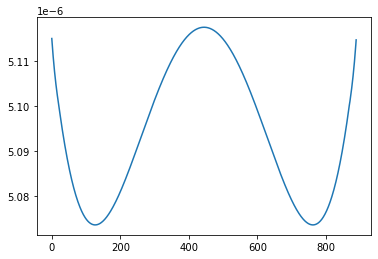

In [74]:
F_xc = sim.xcs[3].F_xc 
plot(F_xc)
#plot(sim.xcs[3].F_xc)
#plot(sim.xcs[25].F_xc)
#len(sim.xcs)
#fil_F = savgol_filter(F_xc,35,3)
#plot(fil_F)
#ceil(len(fil_F)/35)//2*2+1

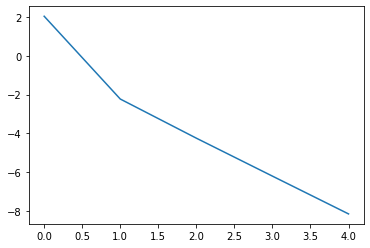

In [36]:
z = linspace(0,1,n)
total_dz = z - sim.z_arr
total_dz = total_dz #- total_dz[0]
plot(total_dz)

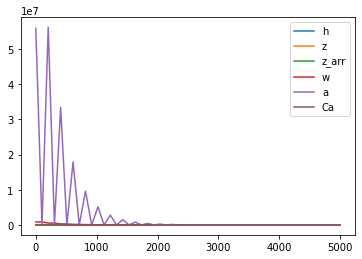

In [95]:
x = linspace(0,5000,n)
#z = linspace(0,1,n)

xmid = (x[1:] + x[:-1])/2.
plot(x, sim.h)
plot(x,z)
plot(x,sim.z_arr)

#plot(xmid,sim.fd_mids)
plot(x,sim.CO2_w)
plot(x,sim.CO2_a)
plot(x,sim.Ca)
legend(['h','z','z_arr','w','a','Ca'])


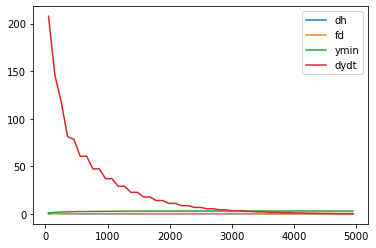

In [96]:
xmid = (x[1:] + x[:-1])/2.
plot(xmid, sim.h[1:]-sim.h[:-1])
plot(xmid,sim.fd_mids)

ymins = []
dydt = []
for i in arange(n-1):
    #print('i=',i, '  ymin=',sim.xcs[i].y.min())
    ymins.append(sim.xcs[i].ymin)
    dydt.append(sim.xcs[i].dr.max())
    
plot(xmid,array(ymins)+4.)
plot(xmid,array(dydt)*100)
legend(['dh','fd','ymin','dydt'])

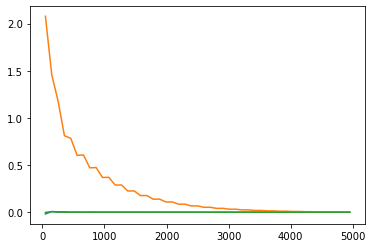

In [98]:
plot(xmid,sim.slopes)
#print('slopes=',sim.slopes)
plot(xmid, abs(sim.dz))
#plot(xmid, sim.fd_mids/500)

T_bs = []
As = []
ws = []
eslopes = []
for i in arange(n-1):
    #T_bs.append(sim.xcs[i].calcT_b())
    As.append(sim.xcs[i].calcA(wantidx=sim.xcs[i].wetidx))
    #L,R = sim.xcs[i].findLR(sim.fd_mids[i])
    ws.append(sim.xcs[i].x[R] - sim.xcs[i].x[L] )
    eslopes.append((sim.h[i+1] - sim.h[i])/sim.L_arr[i-1])
#plot(xmid,array(As)/200.)
#plot(xmid,array(ws)/400.)
plot(xmid,eslopes)
#ylim([0,0.002])
#print('eslopes=',eslopes)

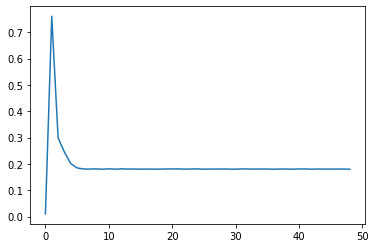

In [99]:
plot(sim.h[1:] - sim.h[:-1])


In [100]:
sim.flow_type

array(['pbflood', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm'], dtype=object)

In [ ]:
from scipy.interpolate import splprep,splev,interp1d

In [ ]:
splprep()
splev()
interp1d()

In [ ]:
print(sim.flow_type)
print(sim.A_a)
print(sim.A_w)
print(sim.fd_mids)
for i in arange(n-1):
    print('i=',i, '  ymin=',sim.xcs[i].y.min())

Q residual for 1.112264408992578  = 9.646567946432672
norm_fd= -1.99201334439851


IndexError: index 0 is out of bounds for axis 0 with size 0

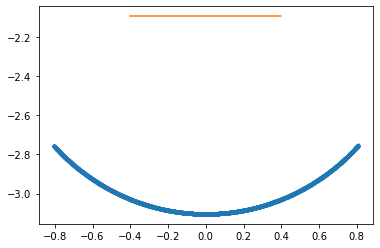

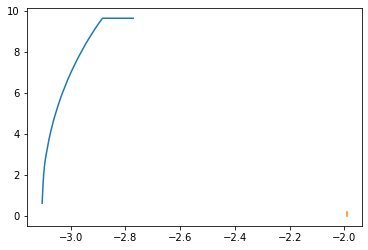

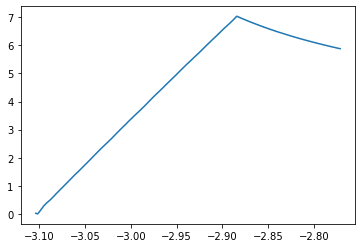

In [101]:
from scipy.signal import savgol_filter

i=0

g=9.8
f=0.1
x=sim.xcs[i].x
y=sim.xcs[i].y
xp=sim.xcs[i].xp
yp=sim.xcs[i].yp
xm=sim.xcs[i].xm
ym=sim.xcs[i].ym
plot(x,y,'.')
wl = sim.fd_mids[i] + y.min()
#wl_old = fd_old + y.min()
plot([-.4,.4],[wl,wl])
#plot([-.4,.4],[wl_old,wl_old],'--')
#xlim([-2.8,2.8])
#ylim([-1.4,-1.35])
maxdepth = y.max() - y.min()
fds=maxdepth*linspace(0.001,0.95,1000)
res=[]
res_alt=[]
res2 = []
As = []
Pws = []
for fd in fds:
    A = sim.xcs[i].A_interp(fd)
    P = sim.xcs[i].P_interp(fd)
    D_H = 4.*A/P
    Q = sign(sim.slopes[i])*A*sqrt(2.*g*abs(sim.slopes[i])*D_H/f)
    res_alt.append(A*sqrt(D_H)-sim.Q_w/(sign(sim.slopes[i])*sqrt(2.*g*abs(sim.slopes[i])/f)))#(abs(sim.Q_w - Q)))
    
    res.append(sim.xcs[i].abs_normal_discharge_residual(fd,sim.slopes[i],0.1,sim.Q_w))
    As.append(sim.xcs[i].calcA(wantidx=y-y.min()<fd))
    Pws.append(sim.xcs[i].calcP(wantidx=y-y.min()<fd))
    res2.append(sim.xcs[i].abs_crit_flow_depth_residual(fd,sim.Q_w))

As = array(As)
fil_As = savgol_filter(As,35,1)


figure()
plot(fds+y.min(),res)
norm_fd_y = sim.xcs[i].calcNormalFlowDepth(sim.Q_w,sim.slopes[i],f=f,old_fd=sim.fd_mids[i]) + y.min()
plot([norm_fd_y,norm_fd_y], [0.0,0.19])
print('norm_fd=',norm_fd_y)
#plot(fds*maxdepth+y.min(),res2)

#plot(fds*maxdepth+y.min(),res_alt)
#plot(fil_As,res_alt)
#xlim([-4,-3])

#ylim([-.05,.2])
#ylim([-0.05,0.05])
figure()
plot(fds+y.min(),res2)
crit_fd_y = sim.xcs[i].calcCritFlowDepth(sim.Q_w)+y.min()
print('crit fd, y=',crit_fd_y)
plot([crit_fd_y,crit_fd_y],[0.001,0.003])
#xlim([-4,-3])
#print(res[0]-res[1])


figure()
#sim.xcs[i].create_A_interp()
#A_spline=sim.xcs[i].AfromSpline(fds*maxdepth)
#sim.xcs[i].create_P_interp()


#plot(fds*maxdepth+y.min(),As)
#plot(fds*maxdepth+y.min(),fil_As)
plot(fds+y.min(),sim.xcs[i].A_interp(fds))

#figure()
#plot(fds*maxdepth+y.min(),Pws)
#plot(fds*maxdepth+y.min(),sim.xcs[i].P_interp(fds))

#figure()

#Pws = array(Pws)
#Qs = fil_As*sqrt(4*fil_As/Pws)
#plot(fds*maxdepth+y.min(),Qs)

#print(Pws[0])
#sim.fd_mids[i]+y.min()
sim.xcs[i].abs_normal_discharge_residual(-3.4-y.min(), sim.slopes[i], 0.1, sim.Q_w)
#-3.67486-y.min()

In [ ]:
fds

In [ ]:
Tb=sim.xcs[-1].T_b
ywet = y[sim.xcs[-1].wetidx]
xwet = x[sim.xcs[-1].wetidx]
#plot(xwet[1:],Tb[1:]-Tb[:-1])
#plot(xwet,Tb)
dr=sim.xcs[-1].dr
#plot(xwet[1:],dr[1:]-dr[:-1])
plot(xwet,dr)

In [ ]:
from scipy.signal import savgol_filter

fil_dr = savgol_filter(dr,15,3,mode='wrap')
plot(xwet,dr,xwet,fil_dr)
figure()
plot(fil_dr[1:]-fil_dr[:-1])

In [ ]:
diff_bnd=0
diff_bnd2=1

V_w = sim.V_w
V_w_mean = sim.V_w_mean
dx = sim.dx_ad
dt = sim.dt_ad
CO2_w = sim.CO2_w
CO2_a = sim.CO2_a
print((1./dt -(np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2.*dx))*CO2_w[diff_bnd])

print(((np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2*dx))*CO2_w[diff_bnd2])

In [ ]:
sim.

In [ ]:
np.sign(V_w[0])*(V_w[diff_bnd]/V_w_mean)

In [ ]:
V_w_mean

In [ ]:
from olm.calcite import concCaEqFromPCO2,solutionFromCaPCO2,palmerFromSolution,pwpFromSolution,pwp_to_mm_yr

In [ ]:
concCaEqFromPCO2()

In [ ]:
from olm.calcite import concCaEqFromPCO2,solutionFromCaPCO2,palmerFromSolution,calc_K_H
g=9.8#m/s^2
rho_limestone = 2.6#g/cm^3
rho_w = 998.2#kg/m^3
D_Ca = 10**-9#m^2/s
nu = 1.3e-6#m^2/s at 10 C
Sc = nu/D_Ca
g_mol_CaCO3 = 100.09
L_per_m3 = 1000.
secs_per_year =  3.154e7
secs_per_hour = 60.*60.


#print(Sc)

In [ ]:
sim.update_dimnless_params()
sim.initialize_conc_arrays()

K_w = sim.gas_transf_vel*sim.W/sim.A_w
K_a = sim.gas_transf_vel*sim.W/sim.A_a
        

F = np.zeros(sim.n_nodes - 1)
F_palmer = np.zeros(sim.n_nodes - 1)

mm_yr_to_mols_sec = 100.*rho_limestone/g_mol_CaCO3/secs_per_year/100./(sim.D_H_w/2.)

i=sim.n_nodes-1
this_CO2_w = sim.CO2_w[i]*sim.pCO2_high
this_CO2_a = sim.CO2_a[i]*sim.pCO2_high
this_Ca = sim.Ca[i]*sim.Ca_eq_0
#if palmer:
sol = solutionFromCaPCO2(this_Ca, this_CO2_w, T_C=sim.T_cave)
F_pwp = pwp_to_mm_yr(pwpFromSolution(sol,PCO2=this_CO2_w))
F_palmer[i-1] = palmerFromSolution(sol, PCO2=this_CO2_w)
R_palmer = F_palmer[i-1]*mm_yr_to_mols_sec[i-1]
this_xc = sim.xcs[i-1]
eSlope = (sim.h[i] - sim.h[i-1])/sim.L_arr[i-1]
this_xc.setEnergySlope(eSlope)
this_xc.setMaxVelPoint(sim.fd_mids[i-1])
this_xc.calcUmax(sim.Q_w)
T_b = this_xc.calcT_b()
eps = 5*nu*Sc**(-1./3.)/np.sqrt(T_b/rho_w)
#print(eps)
Ca_Eq = concCaEqFromPCO2(this_CO2_w, T_C=sim.T_cave)
#print(this_Ca,Ca_Eq)
F_xc = (D_Ca/eps)*(Ca_Eq - this_Ca)*L_per_m3
P_w = this_xc.wet_ls.sum()
A_w = this_xc.calcA(this_xc.wetidx)
F[i-1] = np.sum(F_xc*this_xc.wet_ls)/P_w #Units of F are mols/m^2/sec
R = F[i-1]*P_w*sim.L_arr[i-1]#4.*F[i-1]/sim.D_H_w[i-1]
sim.F = F
R_CO2 = R/sim.K_H
#dx is negative, so signs on dC terms flip
dCO2_a = -sim.L_arr[i-1]*K_a[i-1]/sim.V_a[i-1]*(this_CO2_w - this_CO2_a)
dCO2_w = sim.L_arr[i-1]*K_w[i-1]/sim.V_w[i-1]*(this_CO2_w - this_CO2_a) - R_CO2/sim.Q_w/L_per_m3#sim.L_arr[i-1]*R_CO2/sim.V_w[i-1]
dCa = R/sim.Q_w/L_per_m3#-sim.L_arr[i-1]*R/sim.V_w[i-1]/(sim.L_arr[i-1]*A_w)/L_per_m3
print(dCO2_a,dCO2_w,dCa)
sim.CO2_a[i-1] = (this_CO2_a + dCO2_a)/sim.pCO2_high
sim.CO2_w[i-1] = (this_CO2_w + dCO2_w)/sim.pCO2_high
sim.Ca[i-1] = (this_Ca + dCa)/sim.Ca_eq_0


In [ ]:
print(sim.Q_w)
print(A_w*sim.V_w[i-1])
sim.L_arr[i-1]*R_CO2/sim.V_w[i-1]
R_CO2/sim.Q_w/L_per_m3

In [ ]:
this_xc.x[this_xc.wetidx].shape
F_xc.

In [ ]:
Re = abs(sim.V_w[i-1])*sim.D_H_w[i-1]/nu
print(Re)
f = 0.1
Sh = (f/8)*(Re-1000)*Sc/(1+12.7*sqrt(f/8)*(Sc**(2./3.) - 1))
print(Sh)
eps_test = sim.D_H_w[i-1]/Sh
print(eps_test)

In [ ]:
D_Ca/eps_test

In [ ]:
sim.D_H_w[i-1]

In [ ]:
eSlope

In [ ]:
cm_m=100.
F_to_m_yr = g_mol_CaCO3*secs_per_year/rho_limestone/cm_m**3
print(F_to_m_yr*sim.xcs[0].F_xc)